# 포스트 코로나EDA (소비지수를 통한 포스트 코로나 시장 예측)

In [422]:
import numpy as np
import pandas as pd

import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트


f
from sklearn.preprocessing import LabelEncoder # 라벨 인코더
import matplotlib.font_manager as fm   # 한글폰트

path = 'C:/Windows/Fonts/malgun.ttf'

font_name = fm.FontProperties(fname=path, size=50).get_name()

plt.rc('font', family=font_name)

import cv2 # 이미지 불러오기  # python -m pip install opencv-python -> 인스톨 하는 법
from PIL import Image

## 목차
- 데이터 확인
-   
-

## 1. index 데이터 읽기

In [133]:
index = pd.read_csv('index.csv')

In [134]:
index

,period,catl,catm,age,gender,sido,sigungu,cgi
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595
...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600


## 1 - 1) 변수 설명

period = 기준월 

catl = 대분류   

catm = 중분류   

age = 연령대   

gender = 성별   

sido = 서울시   

sigungu = 구별 분류   

cgi = 카테고리성장지수 (2018년 월평균 대비 매출 성장 비율, 100을 기준으로 이상이면 매출 상승, 이하면 하락)
      여기서는 소비지수라고 칭하겠음-> 매출이 상승함은 곳 소비가 증가했다는 것으로

## 1 - 2) 정보 확인

In [135]:
index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127525 entries, 0 to 127524
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   period   127525 non-null  int64  
 1   catl     127525 non-null  object 
 2   catm     127525 non-null  object 
 3   age      127525 non-null  object 
 4   gender   127525 non-null  object 
 5   sido     127525 non-null  object 
 6   sigungu  127525 non-null  object 
 7   cgi      127525 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 7.8+ MB


In [136]:
index['catm'].unique()

array(['건강관리용품', '가공식품', '기호식품', '담배', '빙과류', '빵류', '신선식품', '유제품류', '음료',
       '제과류', '주류', '생활용품', '애완동물용품', '기타화장품', '바디/헤어용품', '뷰티소품', '화장품'],
      dtype=object)

## 2. 19년~20년 5월동안 소비지수 추이 확인

### 2 - 1) 소비지수 추이 그래프

In [137]:
index2 = index.groupby('period').mean()
index2 = index2.reset_index()
index2

,period,cgi
0,201901,104.606597
1,201902,91.543648
2,201903,101.346404
3,201904,98.113456
4,201905,105.569370
5,201906,106.861123
6,201907,107.665693
7,201908,113.932133
8,201909,104.759690
9,201910,96.837257


In [138]:
index2['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 8월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']

In [467]:
index2

,period,cgi,year
0,19년 01월,104.606597,19년
1,19년 02월,91.543648,19년
2,19년 03월,101.346404,19년
3,19년 04월,98.113456,19년
4,19년 05월,105.569370,19년
5,19년 06월,106.861123,19년
6,19년 07월,107.665693,19년
7,19년 8월,113.932133,19년
8,19년 09월,104.759690,19년
9,19년 10월,96.837257,19년


Text(12.1, 109, '')

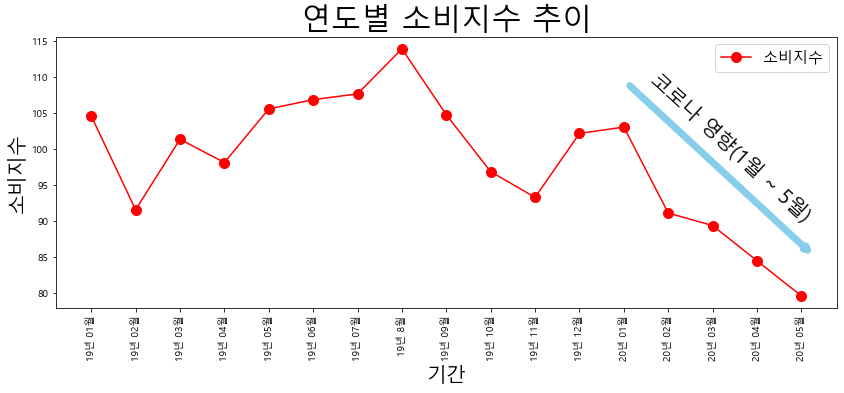

In [140]:
# 월별 확진자 수에 대한 시각화 그래프

plt.figure( figsize = ( 14, 5 ) )
plt.xticks( rotation = 'vertical' )
plt.plot( index2.period, index2.cgi, marker = 'o', markersize = 10 , color = 'red')
plt.title( '연도별 소비지수 추이', size = 30 )
plt.xlabel( '기간', size = 20 )
plt.ylabel( '소비지수', size = 20 )
plt.legend( labels = [ '소비지수' ], loc = 'best', fontsize = 15 )
plt.ylim( )

plt.annotate( '코로나 영향(1월 ~ 5월)',   
               xy = ( 14.4, 90 ),           
              rotation = -42.5,               
              va = 'baseline',                 
              ha = 'center',                   
              fontsize = 20,                   
             )

plt.annotate( '',
              xy = ( 16.3, 85 ),      
              xytext = ( 12.1, 109 ),    
              xycoords = 'data',        
              arrowprops = dict( arrowstyle = '->', color = 'skyblue', lw = 7 ), 
             )


-> 20년 01월에서부터 지수가 급격히 떨어짐 ( 코로나 영향으로 외출을 자제하게 돼서 전체적인 소비가 떨어진 것으로 예상 )

## 2 - 2) 19, 20년 소비지수 비교

In [141]:
index2['year'] = ['19년', '19년', '19년', '19년', '19년', '19년', '19년', '19년', '19년',
       '19년', '19년', '19년', '20년', '20년', '20년', '20년', '20년']
index2

,period,cgi,year
0,19년 01월,104.606597,19년
1,19년 02월,91.543648,19년
2,19년 03월,101.346404,19년
3,19년 04월,98.113456,19년
4,19년 05월,105.569370,19년
5,19년 06월,106.861123,19년
6,19년 07월,107.665693,19년
7,19년 8월,113.932133,19년
8,19년 09월,104.759690,19년
9,19년 10월,96.837257,19년


In [142]:
index3 = index2.drop('period', axis = 1)
index3

,cgi,year
0,104.606597,19년
1,91.543648,19년
2,101.346404,19년
3,98.113456,19년
4,105.569370,19년
5,106.861123,19년
6,107.665693,19년
7,113.932133,19년
8,104.759690,19년
9,96.837257,19년


In [143]:
index3 = index3.groupby('year').mean()
index3 = index3.reset_index()
index3

,year,cgi
0,19년,102.221789
1,20년,89.492255


Text(0.5, 92, '차이')

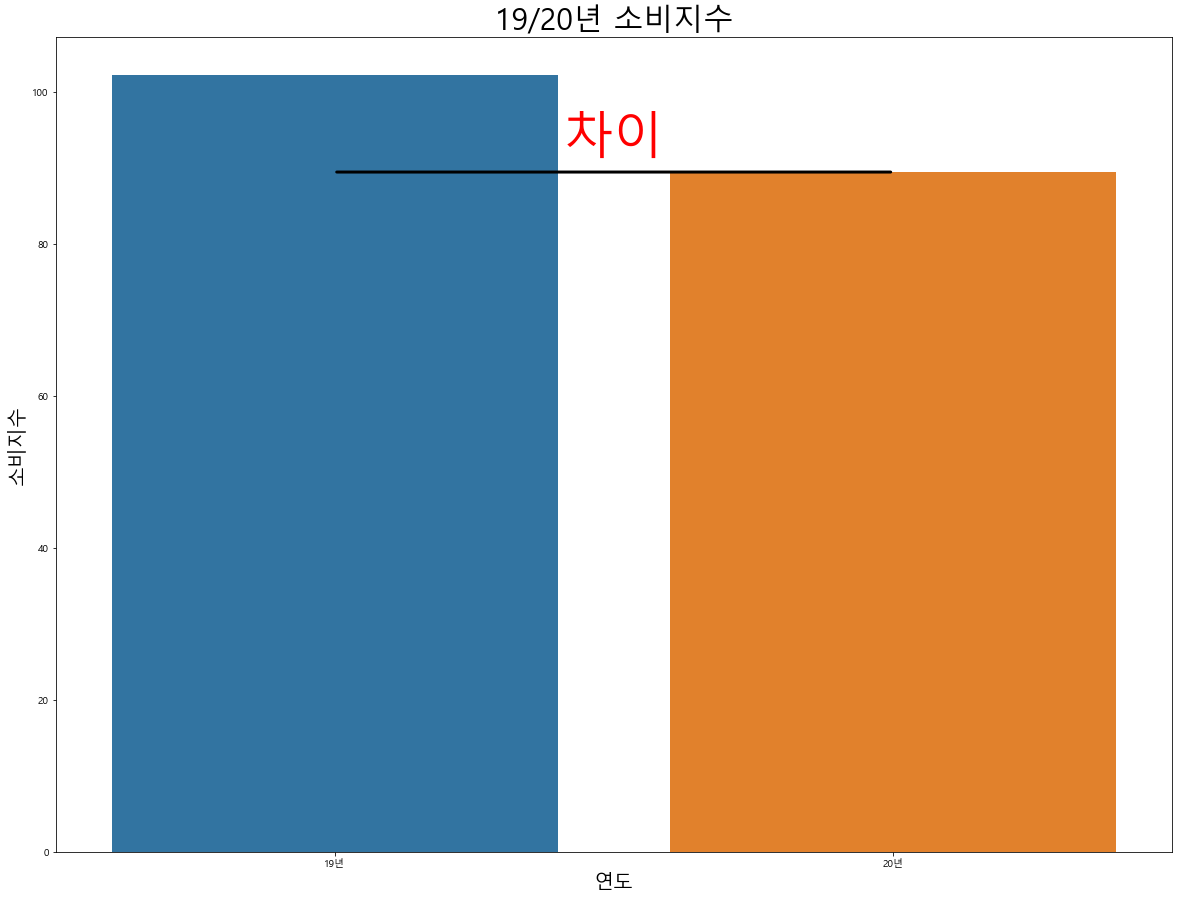

In [144]:
fig = plt.figure(figsize=(20, 15))
sns.barplot(x="year", y="cgi", data=index3 )
plt.title('19/20년 소비지수', size = 30)
plt.xlabel( '연도', size = 20 )
plt.ylabel( '소비지수', size = 20 )
plt.annotate( '',
              xy = ( 0, 89.492255 ),      
              xytext = ( 1, 89.492255 ),    
              xycoords = 'data',        
              arrowprops = dict( arrowstyle = '-', color = 'black', lw = 3 ), 
             )
plt.annotate( '차이',   
               xy = ( 0.5, 92 ),           
              rotation = 0,               
              va = 'baseline',                 
              ha = 'center',                   
              fontsize = 50, color = 'red'                   
             )

-> 소비지수가 약 12정도 하락함 즉, 20년에 들어서 19년과 비교하여 사람들의 소비가 줄어들음

## 3. 품목별 소비지수 추이(기간)

### 1) 담배

In [145]:
index_담배 = index['catm'] == '담배'
담배 = index[index_담배]
df_담배 = 담배.groupby('period').mean()
df1 = df_담배.reset_index()
df1['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df1

,period,cgi
0,19년 01월,139.030177
1,19년 02월,119.102707
2,19년 03월,139.888193
3,19년 04월,137.973887
4,19년 05월,157.481716
5,19년 06월,158.092608
6,19년 07월,161.697291
7,19년 08월,163.235121
8,19년 09월,161.787100
9,19년 10월,164.292144


### 2) 가공식품

In [146]:
index_가공식품 = index['catm'] == '가공식품'
가공식품 = index[index_가공식품]
df가공식품 = 가공식품.groupby('period').mean()
df2 = df가공식품.reset_index()
df2['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df2

,period,cgi
0,19년 01월,113.911291
1,19년 02월,88.539284
2,19년 03월,100.008111
3,19년 04월,96.292727
4,19년 05월,95.736266
5,19년 06월,97.425589
6,19년 07월,97.034345
7,19년 08월,109.885190
8,19년 09월,103.084683
9,19년 10월,92.526690


### 3) 기호식품

In [147]:
index_기호식품 = index['catm'] == '기호식품'
기호식품 = index[index_기호식품]
df기호식품 = 기호식품.groupby('period').mean()
df3 = df기호식품.reset_index()
df3['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df3

,period,cgi
0,19년 01월,121.437395
1,19년 02월,96.594907
2,19년 03월,93.700942
3,19년 04월,99.715750
4,19년 05월,89.306647
5,19년 06월,102.086721
6,19년 07월,88.753642
7,19년 08월,118.190394
8,19년 09월,101.704264
9,19년 10월,80.445864


### 4) 빙과류

In [148]:
index_빙과류 = index['catm'] == '빙과류'
빙과류 = index[index_빙과류]
df빙과류 = 빙과류.groupby('period').mean()
df4 = df빙과류.reset_index()
df4['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df4

,period,cgi
0,19년 01월,66.746883
1,19년 02월,73.070988
2,19년 03월,79.990185
3,19년 04월,82.344128
4,19년 05월,116.402754
5,19년 06월,142.469168
6,19년 07월,152.772008
7,19년 08월,157.375650
8,19년 09월,93.198153
9,19년 10월,72.946066


### 5) 건강관리용품

In [149]:
index_건강관리용품 = index['catm'] == '건강관리용품'
건강관리용품 = index[index_건강관리용품]
df건강관리용품 = 건강관리용품.groupby('period').mean()
df5 = df건강관리용품.reset_index()
df5['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df5

,period,cgi
0,19년 01월,98.862121
1,19년 02월,100.595043
2,19년 03월,106.770199
3,19년 04월,98.643075
4,19년 05월,105.855902
5,19년 06월,113.475600
6,19년 07월,119.310906
7,19년 08월,116.304457
8,19년 09월,115.784744
9,19년 10월,110.120556


### 6) 빵류

In [150]:
index_빵류 = index['catm'] == '빵류'
빵류 = index[index_빵류]
df빵류 = 빵류.groupby('period').mean()
df6 = df빵류.reset_index()
df6['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df6

,period,cgi
0,19년 01월,115.661583
1,19년 02월,89.730972
2,19년 03월,106.831248
3,19년 04월,106.149997
4,19년 05월,101.589843
5,19년 06월,100.016049
6,19년 07월,97.710935
7,19년 08월,97.291559
8,19년 09월,91.781679
9,19년 10월,96.901521


### 7) 신선식품

In [151]:
index_신선식품 = index['catm'] == '신선식품'
신선식품 = index[index_신선식품]
df신선식품 = 신선식품.groupby('period').mean()
df7 = df신선식품.reset_index()
df7['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df7

,period,cgi
0,19년 01월,115.067338
1,19년 02월,94.644699
2,19년 03월,101.996541
3,19년 04월,96.502162
4,19년 05월,97.038675
5,19년 06월,94.975688
6,19년 07월,91.942335
7,19년 08월,100.965206
8,19년 09월,103.773119
9,19년 10월,81.927836


### 8) 유제품류

In [152]:
index_유제품류 = index['catm'] == '유제품류'
유제품류 = index[index_유제품류]
df유제품류 = 유제품류.groupby('period').mean()
df8 = df유제품류.reset_index()
df8['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df8

,period,cgi
0,19년 01월,98.495226
1,19년 02월,87.706006
2,19년 03월,104.584621
3,19년 04월,99.802045
4,19년 05월,101.175086
5,19년 06월,100.187905
6,19년 07월,100.020341
7,19년 08월,103.917142
8,19년 09월,97.855256
9,19년 10월,96.929191


### 9) 음료

In [153]:
index_음료 = index['catm'] == '음료'
음료 = index[index_음료]
df음료 = 음료.groupby('period').mean()
df9 = df음료.reset_index()
df9['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df9

,period,cgi
0,19년 01월,94.986281
1,19년 02월,84.447017
2,19년 03월,96.569569
3,19년 04월,98.760874
4,19년 05월,107.870076
5,19년 06월,108.660403
6,19년 07월,108.861276
7,19년 08월,112.118196
8,19년 09월,105.351278
9,19년 10월,96.403368


### 10) 제과류

In [154]:
index_제과류 = index['catm'] == '제과류'
제과류 = index[index_제과류]
df제과류 = 제과류.groupby('period').mean()
df10 = df제과류.reset_index()
df10['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df10

,period,cgi
0,19년 01월,98.265479
1,19년 02월,98.332982
2,19년 03월,113.194540
3,19년 04월,99.810999
4,19년 05월,101.265166
5,19년 06월,95.780481
6,19년 07월,88.383526
7,19년 08월,92.922116
8,19년 09월,93.886659
9,19년 10월,105.982225


### 11) 주류

In [155]:
index_주류 = index['catm'] == '주류'
주류 = index[index_주류]
df주류 = 주류.groupby('period').mean()
df11 = df주류.reset_index()
df11['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df11

,period,cgi
0,19년 01월,102.612247
1,19년 02월,93.222855
2,19년 03월,96.943642
3,19년 04월,94.292530
4,19년 05월,101.793152
5,19년 06월,106.309610
6,19년 07월,100.463547
7,19년 08월,106.950105
8,19년 09월,105.267742
9,19년 10월,90.056441


### 12) 생활용품

In [156]:
index_생활용품 = index['catm'] == '생활용품'
생활용품 = index[index_생활용품]
df생활용품 = 생활용품.groupby('period').mean()
df12 = df생활용품.reset_index()
df12['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df12

,period,cgi
0,19년 01월,97.497398
1,19년 02월,86.023704
2,19년 03월,102.193612
3,19년 04월,93.773262
4,19년 05월,110.283661
5,19년 06월,100.373343
6,19년 07월,102.963706
7,19년 08월,102.501757
8,19년 09월,95.422952
9,19년 10월,101.854458


### 13) 애완동물용품

In [157]:
index_애완동물용품 = index['catm'] == '애완동물용품'
애완동물용품 = index[index_애완동물용품]
df애완동물용품 = 애완동물용품.groupby('period').mean()
df13 = df애완동물용품.reset_index()
df13['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df13

,period,cgi
0,19년 01월,98.315837
1,19년 02월,95.614286
2,19년 03월,103.698453
3,19년 04월,93.747333
4,19년 05월,101.825244
5,19년 06월,102.568755
6,19년 07월,107.113058
7,19년 08월,128.297079
8,19년 09월,114.689890
9,19년 10월,110.281140


### 14) 기타화장품

In [158]:
index_기타화장품 = index['catm'] == '기타화장품'
기타화장품 = index[index_기타화장품]
df기타화장품 = 기타화장품.groupby('period').mean()
df14 = df기타화장품.reset_index()
df14['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월']
df14

,period,cgi
0,19년 01월,59.514080
1,19년 02월,77.390632
2,19년 03월,69.381014
3,19년 04월,122.014490
4,19년 05월,176.637135
5,19년 06월,126.280624
6,19년 07월,105.421483
7,19년 08월,78.257207
8,19년 09월,80.751257
9,19년 10월,45.548091


### 15) 바디/헤어용품

In [159]:
index_헤어용품 = index['catm'] == '바디/헤어용품'
바디헤어용품 = index[index_헤어용품]
df_바디헤어용품 = 바디헤어용품.groupby('period').mean()
df15 = df_바디헤어용품.reset_index()
df15['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df15

,period,cgi
0,19년 01월,132.457065
1,19년 02월,79.750070
2,19년 03월,86.545793
3,19년 04월,87.189160
4,19년 05월,89.564089
5,19년 06월,86.152291
6,19년 07월,85.484580
7,19년 08월,107.149075
8,19년 09월,111.838523
9,19년 10월,76.561298


### 16) 뷰티소품

In [160]:
index_뷰티소품 = index['catm'] == '뷰티소품'
뷰티소품 = index[index_뷰티소품]
df_뷰티소품 = 뷰티소품.groupby('period').mean()
df16 = df_뷰티소품.reset_index()
df16['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df16

,period,cgi
0,19년 01월,81.286863
1,19년 02월,81.213628
2,19년 03월,102.786158
3,19년 04월,98.682135
4,19년 05월,102.133265
5,19년 06월,105.761050
6,19년 07월,125.821041
7,19년 08월,116.864842
8,19년 09월,89.270393
9,19년 10월,97.238371


### 17) 화장품

In [161]:
index_화장품 = index['catm'] == '화장품'
화장품 = index[index_화장품]
df_가공식품 = 가공식품.groupby('period').mean()
df17 = df_가공식품.reset_index()
df17['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
df17

,period,cgi
0,19년 01월,113.911291
1,19년 02월,88.539284
2,19년 03월,100.008111
3,19년 04월,96.292727
4,19년 05월,95.736266
5,19년 06월,97.425589
6,19년 07월,97.034345
7,19년 08월,109.885190
8,19년 09월,103.084683
9,19년 10월,92.526690


### 품목별 한눈에 보기

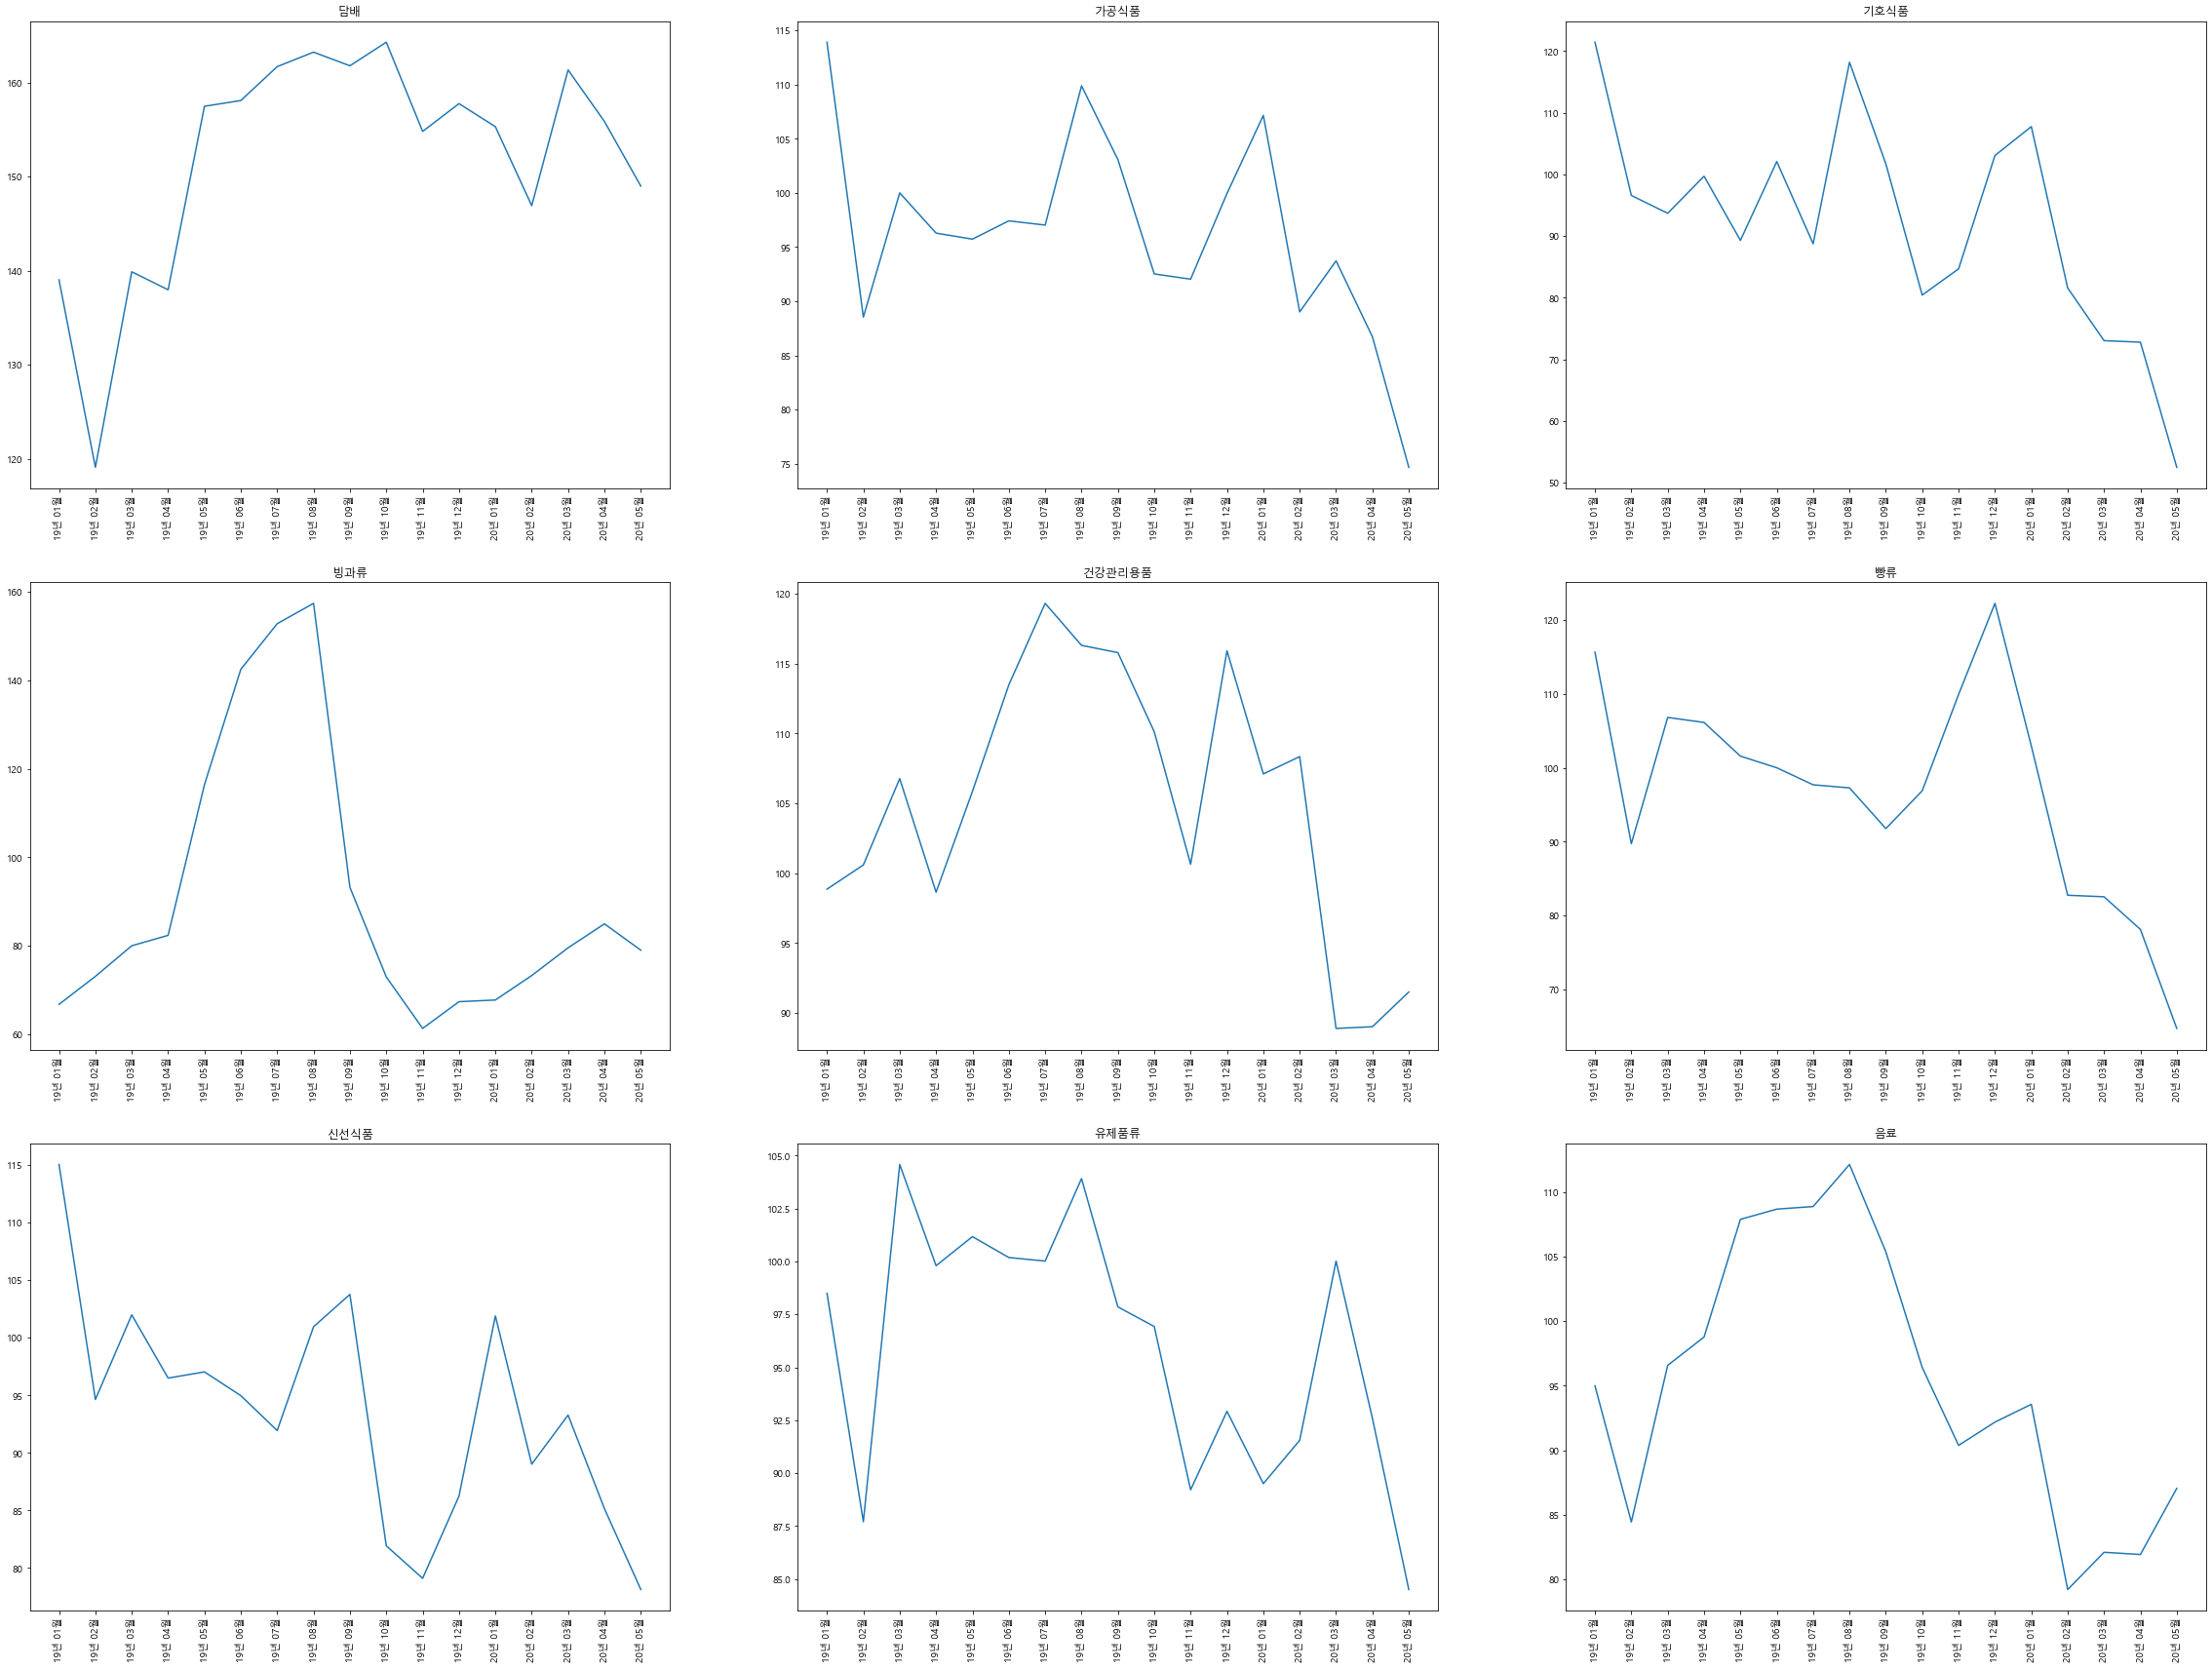

In [162]:
fig = plt.figure( figsize = ( 40, 30 ) ) 
plt.subplot(3,3,1)
plt.plot(df1.period,df1.cgi)
plt.title('담배')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,2)
plt.plot(df2.period,df2.cgi)
plt.title('가공식품')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,3)
plt.plot(df3.period,df3.cgi)
plt.title('기호식품')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,4)
plt.plot(df4.period,df4.cgi)
plt.title('빙과류')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,5)
plt.plot(df5.period,df5.cgi)
plt.title('건강관리용품')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,6)
plt.plot(df6.period,df6.cgi)
plt.title('빵류')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,7)
plt.plot(df7.period,df7.cgi)
plt.title('신선식품')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,8)
plt.plot(df8.period,df8.cgi)
plt.title('유제품류')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,9)
plt.plot(df9.period,df9.cgi)
plt.title('음료')
plt.xticks( rotation = 'vertical' )

plt.show()


- 담배, 가공식품, 기호식품, 빙과류, 건강관리용품, 빵류, 신선식품, 유제품류, 음료는   
  담배와 빙과류를 제외한 모든 품목이 1월부터 소비지수가 하락세를 보였다.

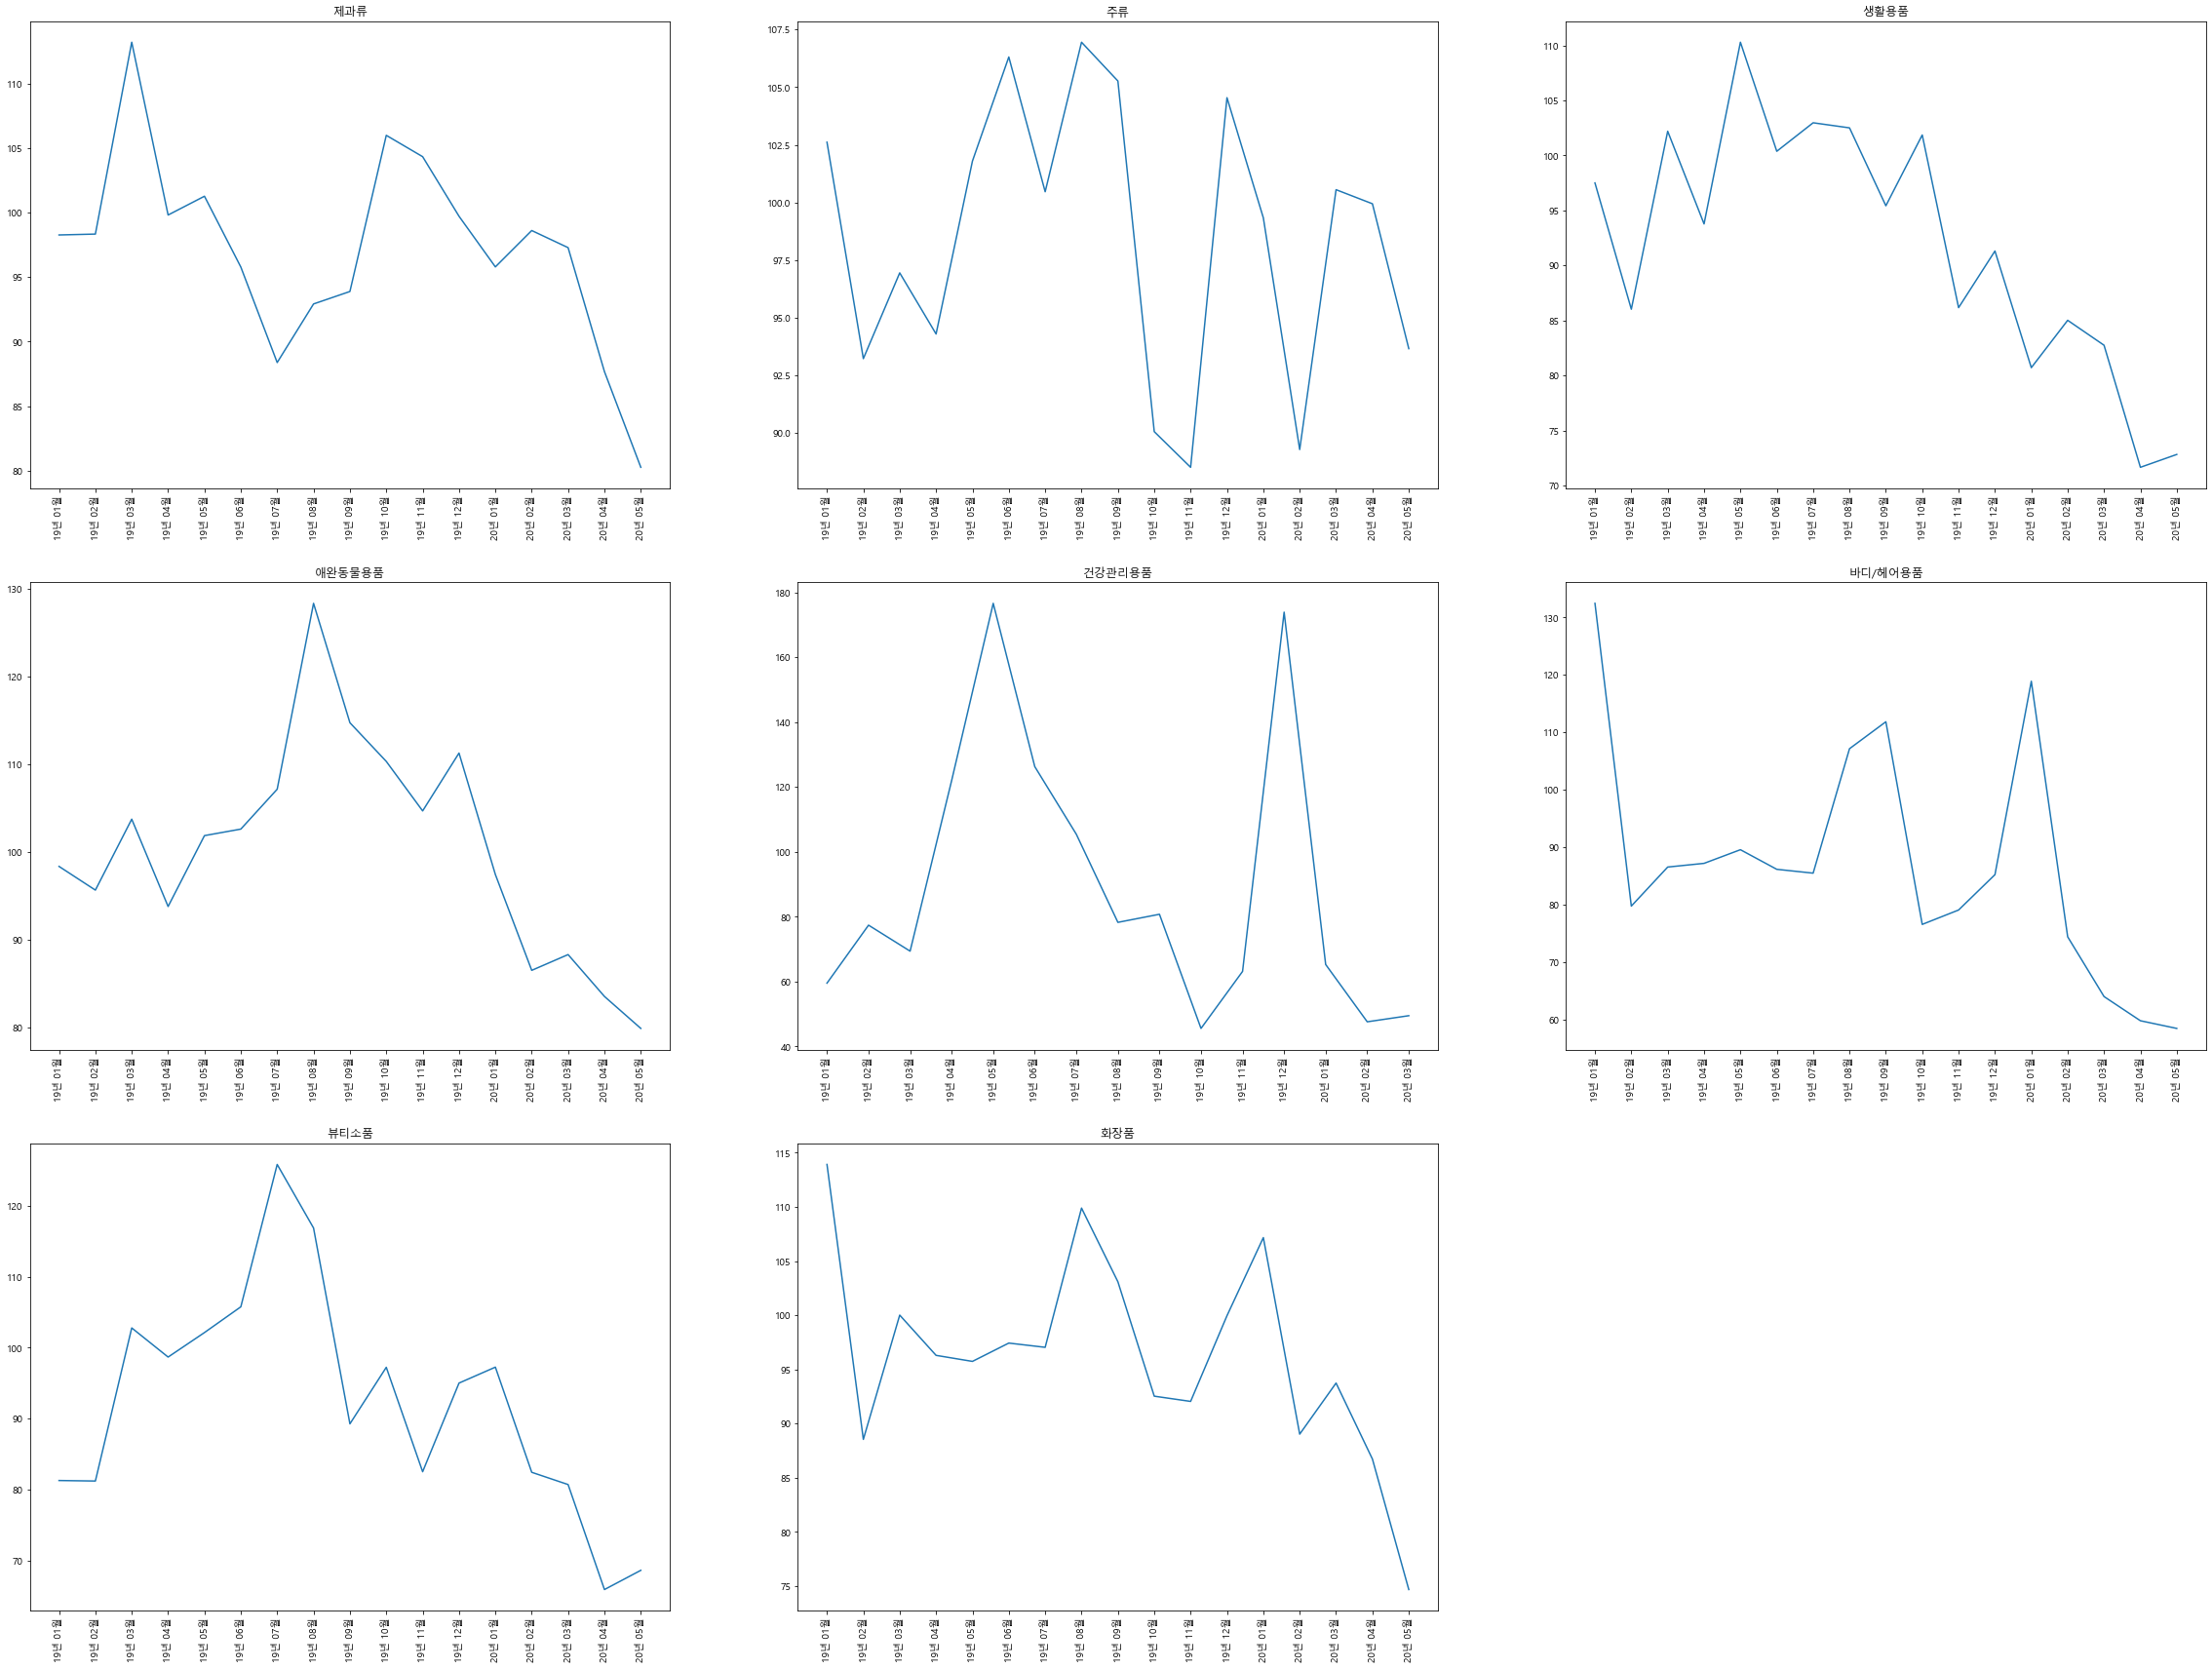

In [163]:
fig = plt.figure( figsize = ( 40, 30 ) ) 
plt.subplot(3,3,1)
plt.plot(df10.period,df10.cgi)
plt.title('제과류')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,2)
plt.plot(df11.period,df11.cgi)
plt.title('주류')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,3)
plt.plot(df12.period,df12.cgi)
plt.title('생활용품')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,4)
plt.plot(df13.period,df13.cgi)
plt.title('애완동물용품')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,5)
plt.plot(df14.period,df14.cgi)
plt.title('건강관리용품')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,6)
plt.plot(df15.period,df15.cgi)
plt.title('바디/헤어용품')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,7)
plt.plot(df16.period,df16.cgi)
plt.title('뷰티소품')
plt.xticks( rotation = 'vertical' )
plt.subplot(3,3,8)
plt.plot(df17.period,df17.cgi)
plt.title('화장품')
plt.xticks( rotation = 'vertical' )
plt.show()

- 주류를 제외한 모든 품목이 1월 이후에 하락세를 보였다.

## 3 - 1). 품목별 소비지수 평균(19~20)

In [164]:
index1 = index.groupby('catm').mean()
index1 = index1.drop('period', axis = 1)
index1 = index1.reset_index()
index1

,catm,cgi
0,가공식품,96.338791
1,건강관리용품,105.145900
2,기타화장품,90.841352
3,기호식품,92.200817
4,담배,151.976001
5,바디/헤어용품,87.190257
6,뷰티소품,92.618241
7,빙과류,91.202146
8,빵류,96.883783
9,생활용품,91.960869


Text(5.5, 130, '높음')

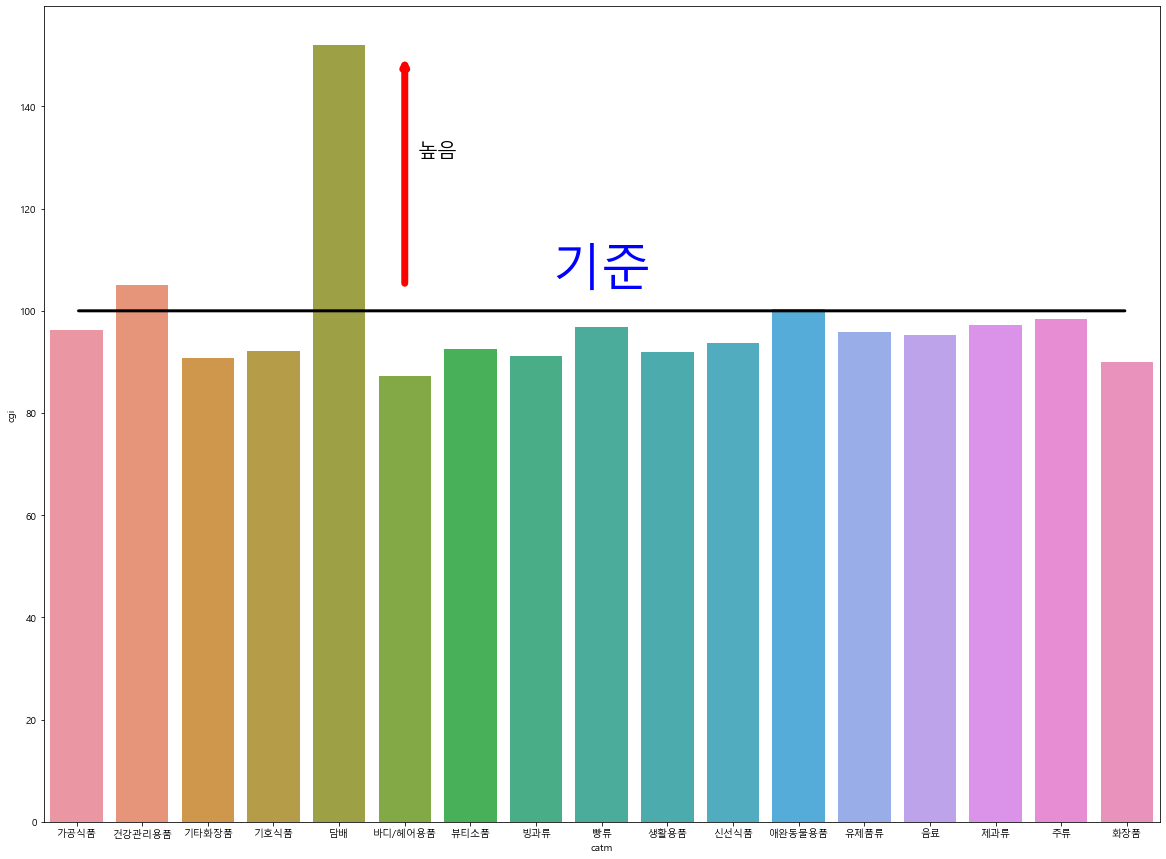

In [165]:
fig = plt.figure(figsize=(20, 15))
sns.barplot(x="catm", y="cgi", data=index1)
plt.annotate( '',
              xy = ( 0, 100 ),      
              xytext = ( 16, 100 ),    
              xycoords = 'data',        
              arrowprops = dict( arrowstyle = '-', color = 'black', lw = 3 ), 
             )
plt.annotate( '기준',   
               xy = ( 8, 105 ),           
              rotation = 0,               
              va = 'baseline',                 
              ha = 'center',                   
              fontsize = 50, color = 'blue'                   
             )
plt.annotate( '',
              xy = ( 5, 150 ),      
              xytext = ( 5, 105 ),    
              xycoords = 'data',        
              arrowprops = dict( arrowstyle = '->', color = 'red', lw = 7 ), 
             )
plt.annotate( '높음',   
               xy = ( 5.5, 130 ),           
              rotation = 0,               
              va = 'baseline',                 
              ha = 'center',                   
              fontsize = 20, color = 'black')

-> 19년, 20년을 통틀어 기준 100을 넘어서는 품목은 건강관리용품과 담배이지만 건강관리용품은 미세하게 상승하였고 담배는 다른 품목과 차이가 명확히 크게 나타났다. 즉 담배의 소비지수는 코로나에 영향을 받지 않은 것으로 보인다.   
- 즉, 담배 제외한 모든 품목들은 코로나의 영향으로 매출이 감소

## 4. 연령별 소비지수

In [166]:
index_a = index.groupby('age').mean()
index_a = index_a.drop('period', axis = 1)
index_a = index_a.reset_index()
index_a

,age,cgi
0,20,117.077202
1,30,95.136327
2,40,93.095016
3,50,94.148630
4,60,97.354995
5,all,94.233087


Text(0.65, 105, '높음')

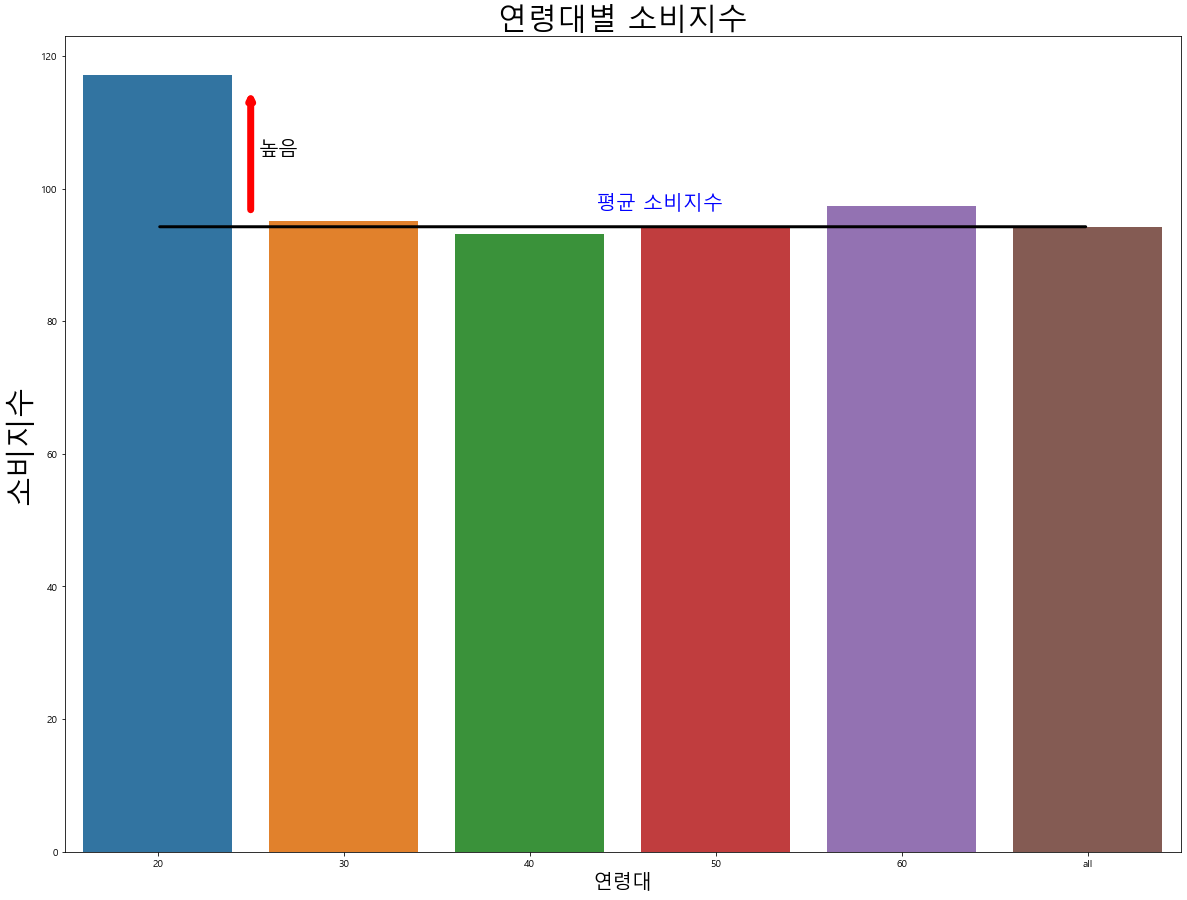

In [167]:
fig = plt.figure(figsize=(20, 15))
sns.barplot(x="age", y="cgi", data=index_a )
plt.title('연령대별 소비지수', size = 30)
plt.xlabel( '연령대', size = 20 )
plt.ylabel( '소비지수', size = 30 )
plt.annotate( '',
              xy = ( 0, 94.233087 ),      
              xytext = ( 5, 94.233087 ),    
              xycoords = 'data',        
              arrowprops = dict( arrowstyle = '-', color = 'black', lw = 3 ), 
             )
plt.annotate( '평균 소비지수',   
               xy = ( 2.7, 97 ),           
              rotation = 0,               
              va = 'baseline',                 
              ha = 'center',                   
              fontsize = 20, color = 'blue'                   
             )
plt.annotate( '',
              xy = ( 0.5, 96.5 ),      
              xytext = ( 0.5, 115 ),    
              xycoords = 'data',        
              arrowprops = dict( arrowstyle = '<-', color = 'red', lw = 7 ), 
             )
plt.annotate( '높음',   
               xy = ( 0.65, 105 ),           
              rotation = 0,               
              va = 'baseline',                 
              ha = 'center',                   
              fontsize = 20, color = 'black')

- 20대가 전체 연령대 평균보다 소비지수가 높게 나타남   
- 이것을 통해 코로나 20대 제외한 모든 연령대의 소비가 줄었지만 20대는 여전히 소비하는 것으로 파악하고 이들의 소비 특징을 분석하기로 함

## 4 - 1) 연령별 소비지수 추이(19~20)

### 1) 20대

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

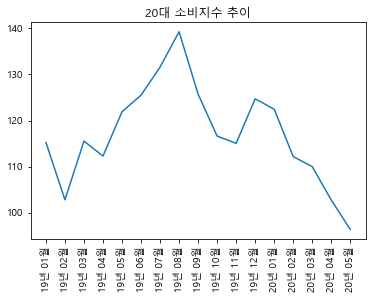

In [168]:
index_20 = index['age'] == '20'
age20 = index[index_20]
df_20 = age20.groupby('period').mean()
df20 = df_20.reset_index()
df20['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
plt.plot(df20.period,df20.cgi)
plt.title('20대 소비지수 추이')
plt.xticks( rotation = 'vertical' )

### 2) 30대

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

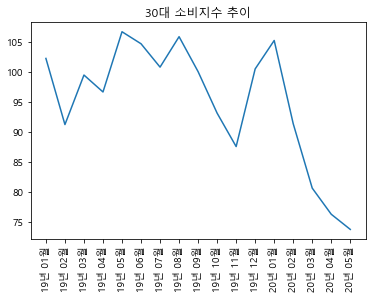

In [169]:
index_30 = index['age'] == '30'
age30 = index[index_30]
df_30 = age30.groupby('period').mean()
df30 = df_30.reset_index()
df30['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
plt.plot(df30.period,df30.cgi)
plt.title('30대 소비지수 추이')
plt.xticks( rotation = 'vertical' )

### 3) 40대

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

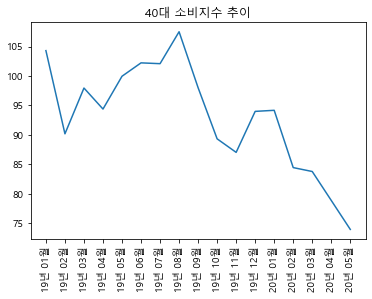

In [170]:
index_40 = index['age'] == '40'
age40 = index[index_40]
df_40 = age40.groupby('period').mean()
df40 = df_40.reset_index()
df40['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
plt.plot(df40.period,df40.cgi)
plt.title('40대 소비지수 추이')
plt.xticks( rotation = 'vertical' )

### 4) 50대

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

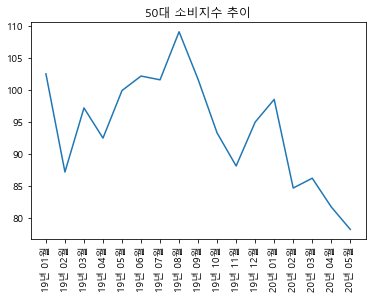

In [171]:
index_50 = index['age'] == '50'
age50 = index[index_50]
df_50 = age50.groupby('period').mean()
df50 = df_50.reset_index()
df50['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
plt.plot(df50.period,df50.cgi)
plt.title('50대 소비지수 추이')
plt.xticks( rotation = 'vertical' )

### 5) 60대

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

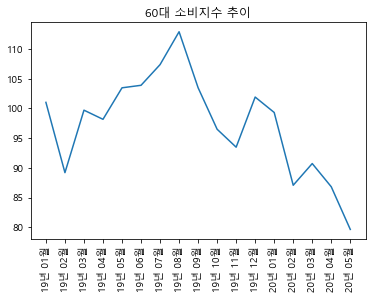

In [172]:
index_60 = index['age'] == '60'
age60 = index[index_60]
df_60 = age60.groupby('period').mean()
df60 = df_60.reset_index()
df60['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
plt.plot(df60.period,df60.cgi)
plt.title('60대 소비지수 추이')
plt.xticks( rotation = 'vertical' )

### 6) 연령전체

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

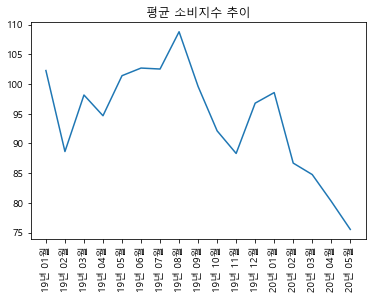

In [173]:
index_all = index['age'] == 'all'
age_all = index[index_all]
df_all = age_all.groupby('period').mean()
dfall = df_all.reset_index()
dfall['period'] = ['19년 01월', '19년 02월', '19년 03월', '19년 04월', '19년 05월', '19년 06월', '19년 07월', '19년 08월', '19년 09월',
       '19년 10월', '19년 11월', '19년 12월', '20년 01월', '20년 02월', '20년 03월', '20년 04월', '20년 05월']
plt.plot(dfall.period,dfall.cgi)
plt.title('평균 소비지수 추이')
plt.xticks( rotation = 'vertical' )

### 7) 한눈에 보기

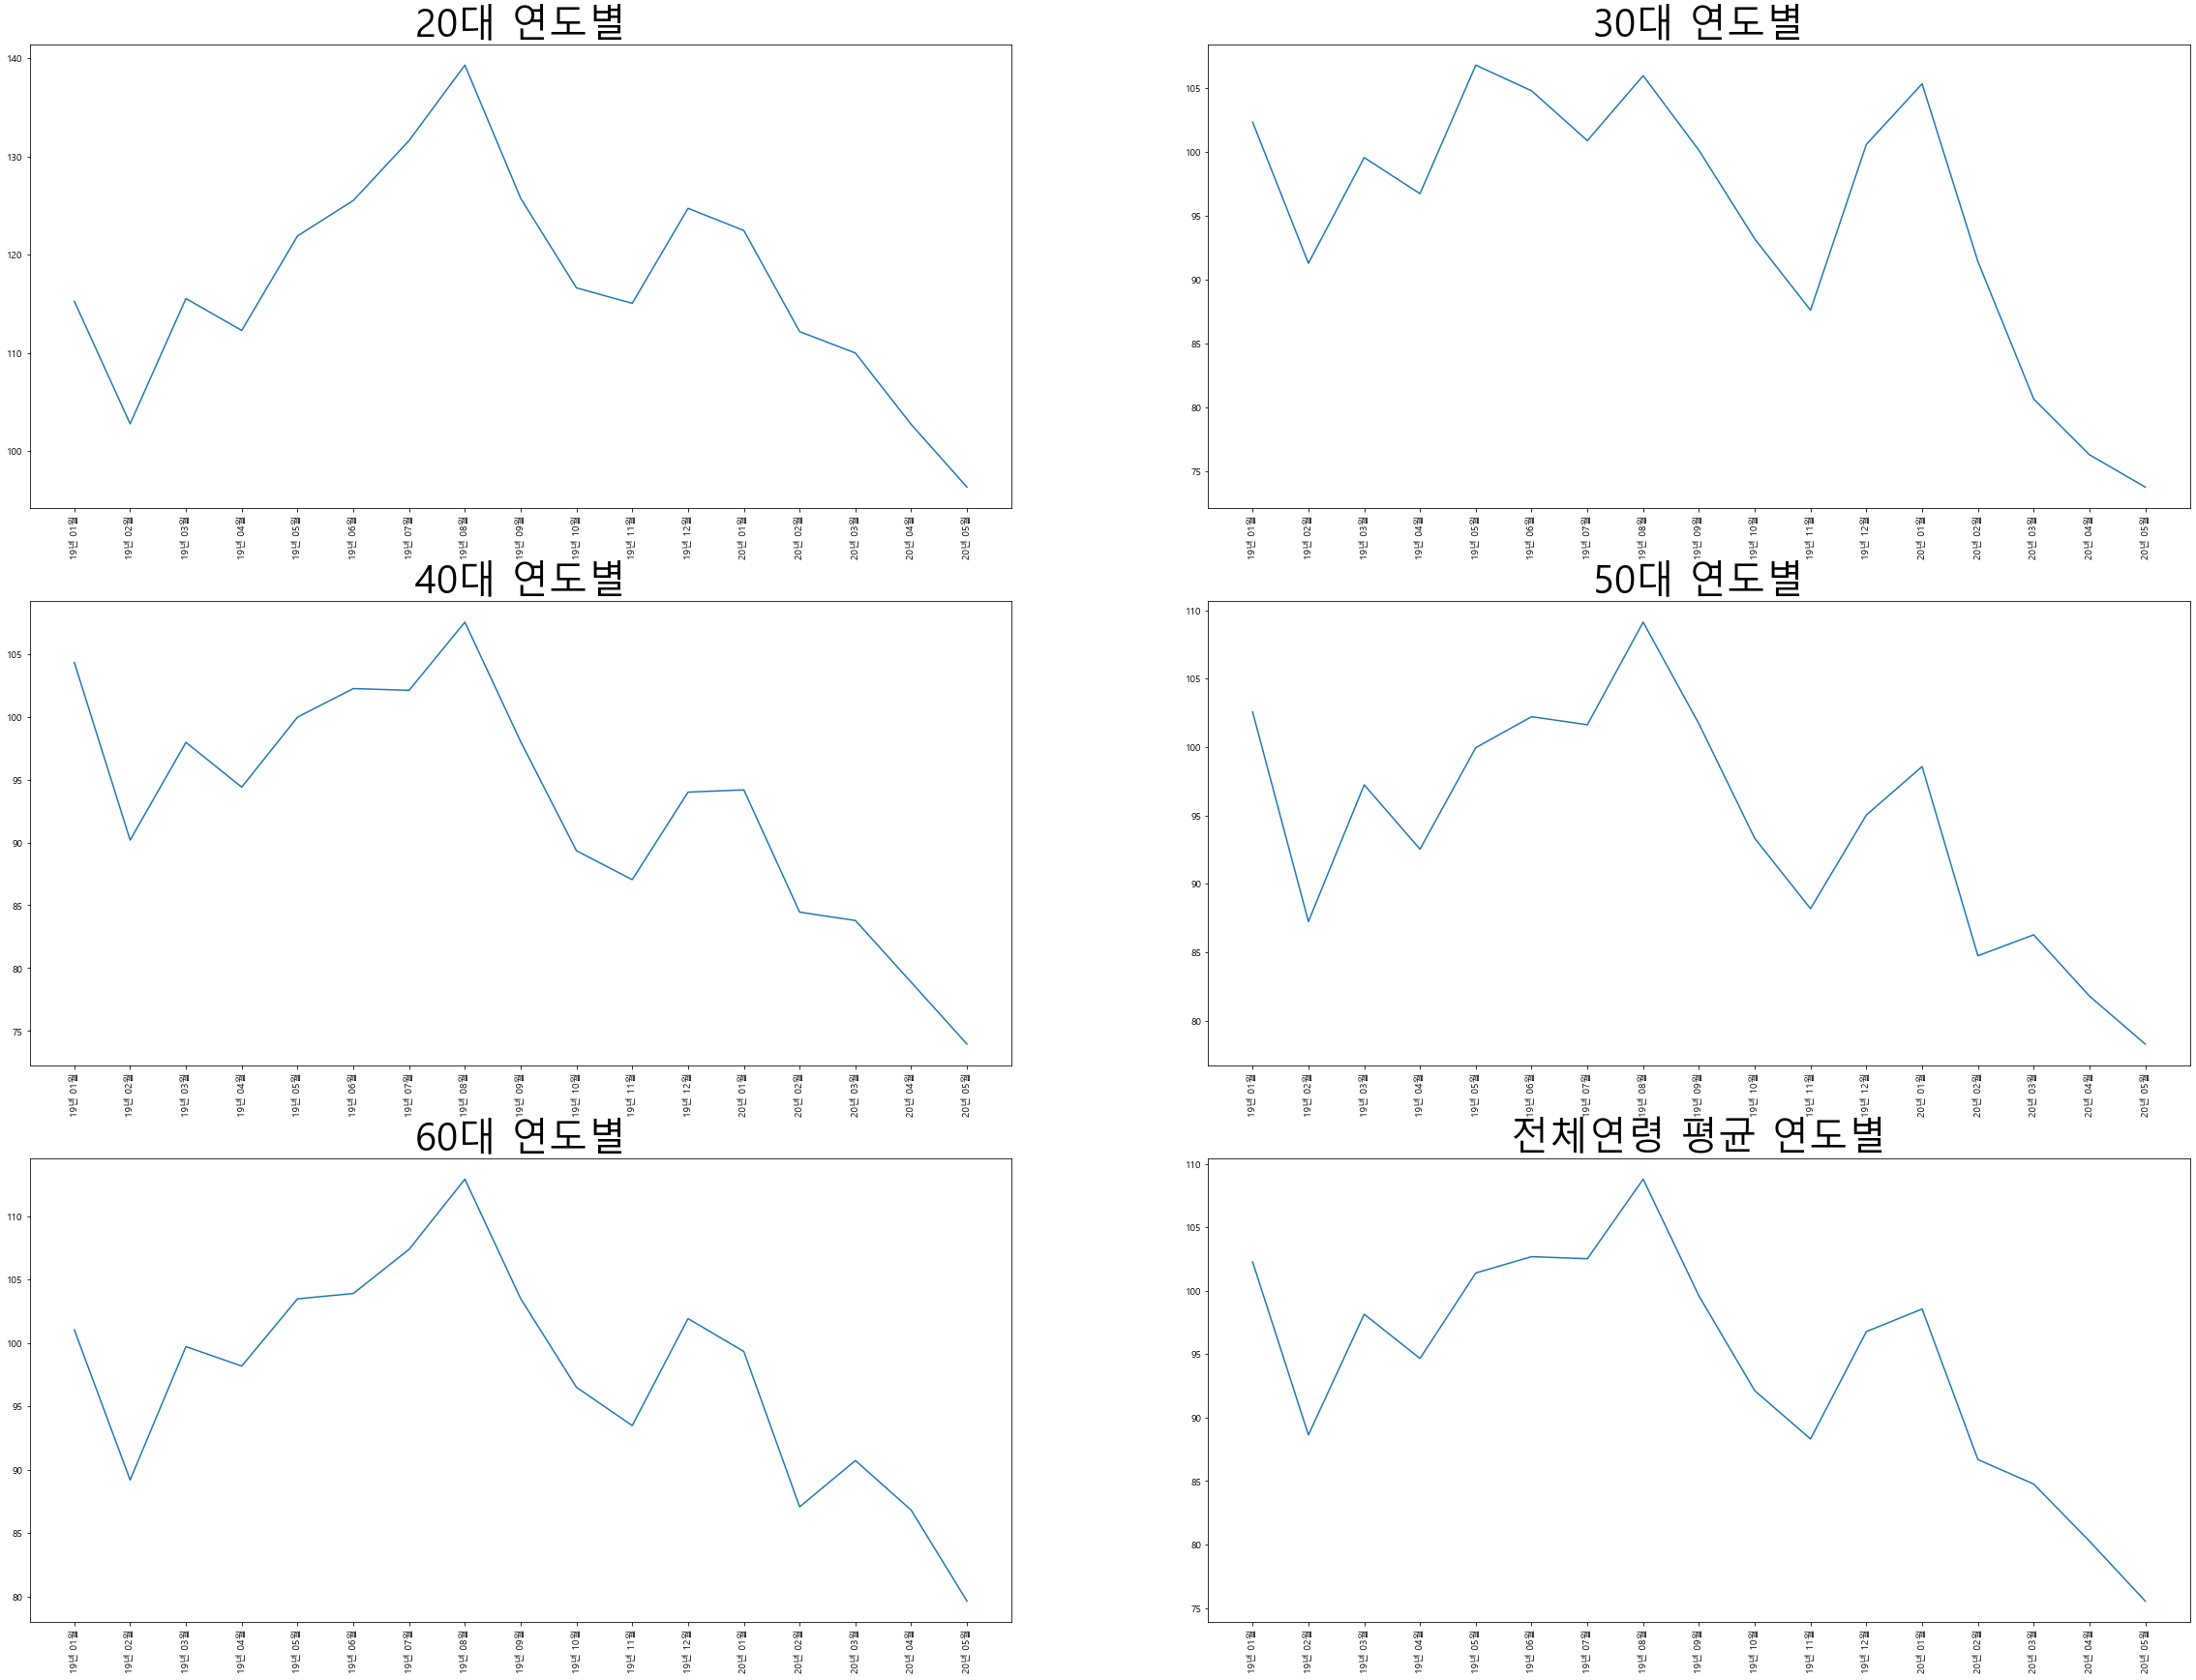

In [174]:
fig = plt.figure( figsize = ( 40, 30 ) ) 
plt.subplot(3,2,1)
plt.plot(df20.period,df20.cgi)
plt.title('20대 연도별', size = 40)
plt.xticks( rotation = 'vertical' )
plt.subplot(3,2,2)
plt.plot(df30.period,df30.cgi)
plt.title('30대 연도별', size = 40)
plt.xticks( rotation = 'vertical' )
plt.subplot(3,2,3)
plt.plot(df40.period,df40.cgi)
plt.title('40대 연도별', size = 40)
plt.xticks( rotation = 'vertical' )
plt.subplot(3,2,4)
plt.plot(df50.period,df50.cgi)
plt.title('50대 연도별', size = 40)
plt.xticks( rotation = 'vertical' )
plt.subplot(3,2,5)
plt.plot(df60.period,df60.cgi)
plt.title('60대 연도별', size = 40)
plt.xticks( rotation = 'vertical' )
plt.subplot(3,2,6)
plt.plot(dfall.period,dfall.cgi)
plt.title('전체연령 평균 연도별', size = 40)
plt.xticks( rotation = 'vertical' )
plt.show()

-> 모든 연령대가 코로나 이후 즉, 20년에 들어서 소비지수가 하락하는 추세였지만, 20대는 1월~5월(코로나 발생 후)까지를 기준으로 소비지수는 항상 100 이상을 기록함
- 즉, 20대 또한 소비지수는 줄었지만 소비지수가 기본적으로 높고 여전히 평균 100이상을 기록하여 20대는 꾸준히 소비를 하는 것으로 파악

## 4 - 2) 연령별 품목 소비지수(19~20 평균)

### 1) 20대

Text(8.5, 110, '기준')

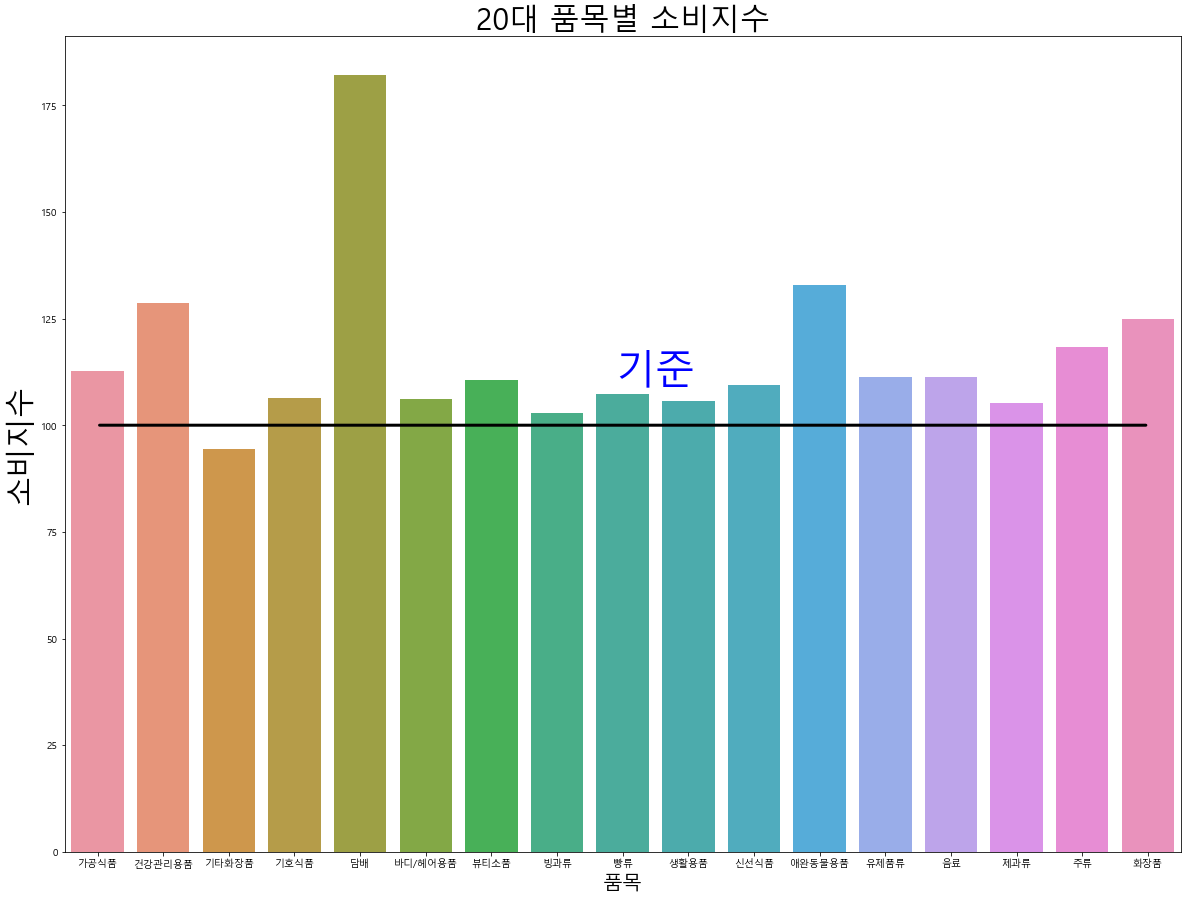

In [175]:
index_20 = index['age'] == '20'
age20 = index[index_20]
age20.drop(['period', 'catl', 'gender', 'sido', 'sigungu'], axis = 1)
catm20 = age20.groupby('catm').mean()
catm20 = catm20.drop('period', axis = 1)
catm20 = catm20.reset_index()
catm20
fig = plt.figure(figsize=(20, 15))
sns.barplot(x="catm", y="cgi", data=catm20 )
plt.title('20대 품목별 소비지수', size = 30)
plt.xlabel( '품목', size = 20 )
plt.ylabel( '소비지수', size = 30 )
plt.annotate( '', xy = ( 0, 100 ), xytext = ( 16, 100 ),  xycoords = 'data',  arrowprops = dict( arrowstyle = '-', color = 'black', lw = 3 ), )
plt.annotate( '기준',  xy = ( 8.5, 110 ), rotation = 0, va = 'baseline', ha = 'center', fontsize = 40, color = 'blue' )

- 기타화장품 품목을 제외한 모든 품목의 소비지수가 100을 넘어서 해당품목의 매출 상승에 영향을 준다고 볼 수 있고 특히 담배 품목의 소비지수가 가장 크다

### 2) 30대

Text(8.5, 110, '기준')

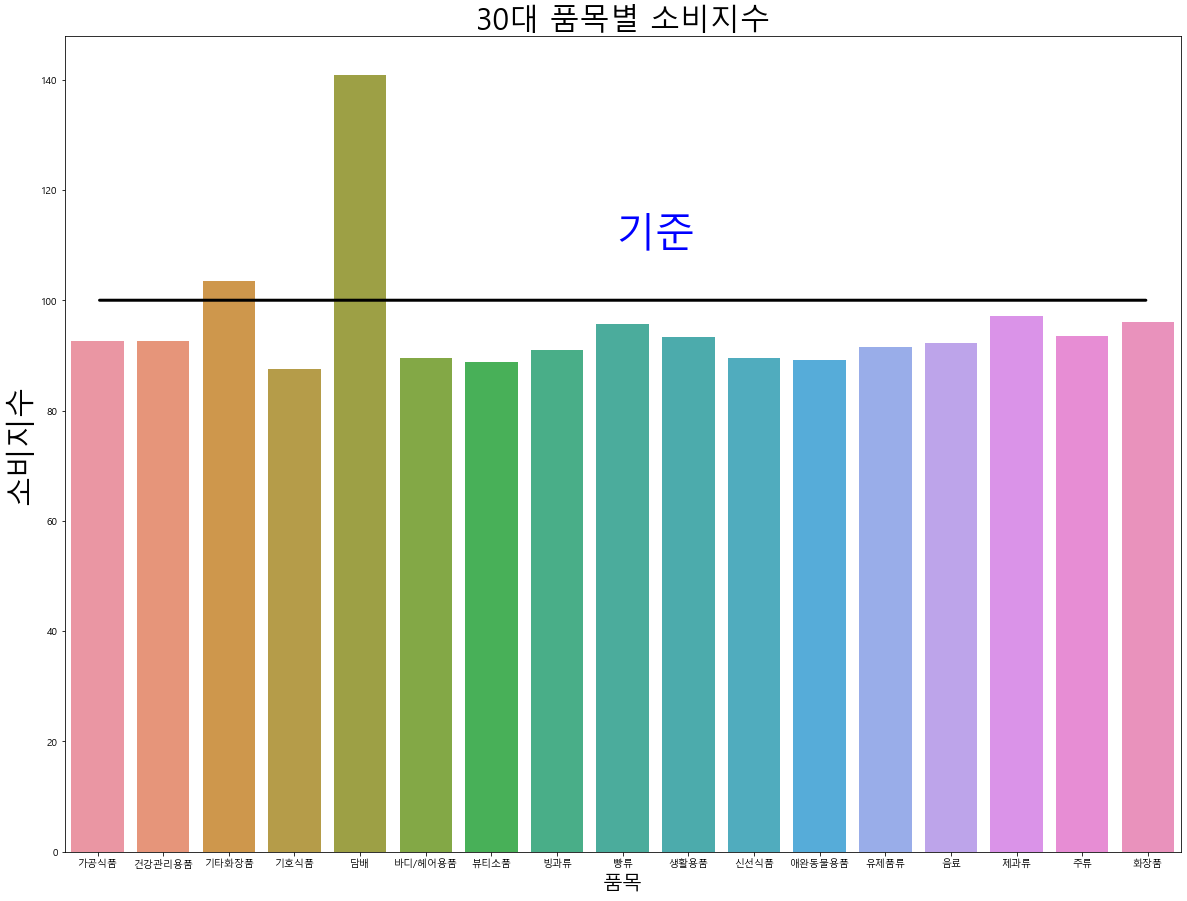

In [176]:
index_30 = index['age'] == '30'
age30 = index[index_30]
age30.drop(['period', 'catl', 'gender', 'sido', 'sigungu'], axis = 1)
catm30 = age30.groupby('catm').mean()
catm30 = catm30.drop('period', axis = 1)
catm30 = catm30.reset_index()
catm30
fig = plt.figure(figsize=(20, 15))
sns.barplot(x="catm", y="cgi", data=catm30 )
plt.title('30대 품목별 소비지수', size = 30)
plt.xlabel( '품목', size = 20 )
plt.ylabel( '소비지수', size = 30 )
plt.annotate( '', xy = ( 0, 100 ), xytext = ( 16, 100 ),  xycoords = 'data',  arrowprops = dict( arrowstyle = '-', color = 'black', lw = 3 ), )
plt.annotate( '기준',  xy = ( 8.5, 110 ), rotation = 0, va = 'baseline', ha = 'center', fontsize = 40, color = 'blue' )

- 담배와 기타화장품 푸목을 제외한 모든 품목이 소비지수 100아래에 있어 30대는 해당 품목에 소비가 하락한 것을 확인

### 3) 40대

Text(8.5, 110, '기준')

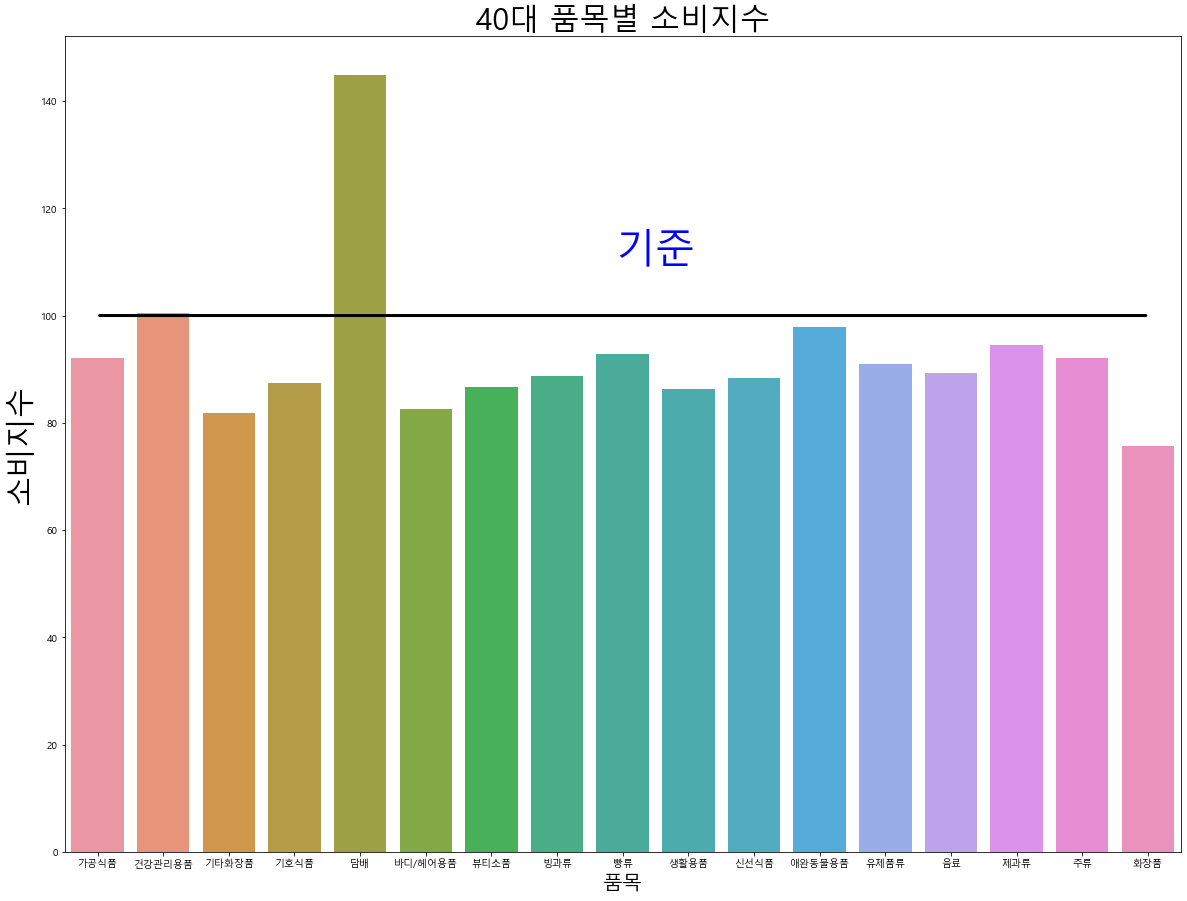

In [177]:
index_40 = index['age'] == '40'
age40 = index[index_40]
age40.drop(['period', 'catl', 'gender', 'sido', 'sigungu'], axis = 1)
catm40 = age40.groupby('catm').mean()
catm40 = catm40.drop('period', axis = 1)
catm40 = catm40.reset_index()
catm40
fig = plt.figure(figsize=(20, 15))
sns.barplot(x="catm", y="cgi", data=catm40 )
plt.title('40대 품목별 소비지수', size = 30)
plt.xlabel( '품목', size = 20 )
plt.ylabel( '소비지수', size = 30 )
plt.annotate( '', xy = ( 0, 100 ), xytext = ( 16, 100 ),  xycoords = 'data',  arrowprops = dict( arrowstyle = '-', color = 'black', lw = 3 ), )
plt.annotate( '기준',  xy = ( 8.5, 110 ), rotation = 0, va = 'baseline', ha = 'center', fontsize = 40, color = 'blue' )

- 건강관리용품과 담배 품목을 제외한 모든 품목의 소비지수가 낮게 나타나서 40대는 2개 품목을 제외한 품목에 소비가 떨어졌음을 확인

### 4) 50대

Text(8.5, 110, '기준')

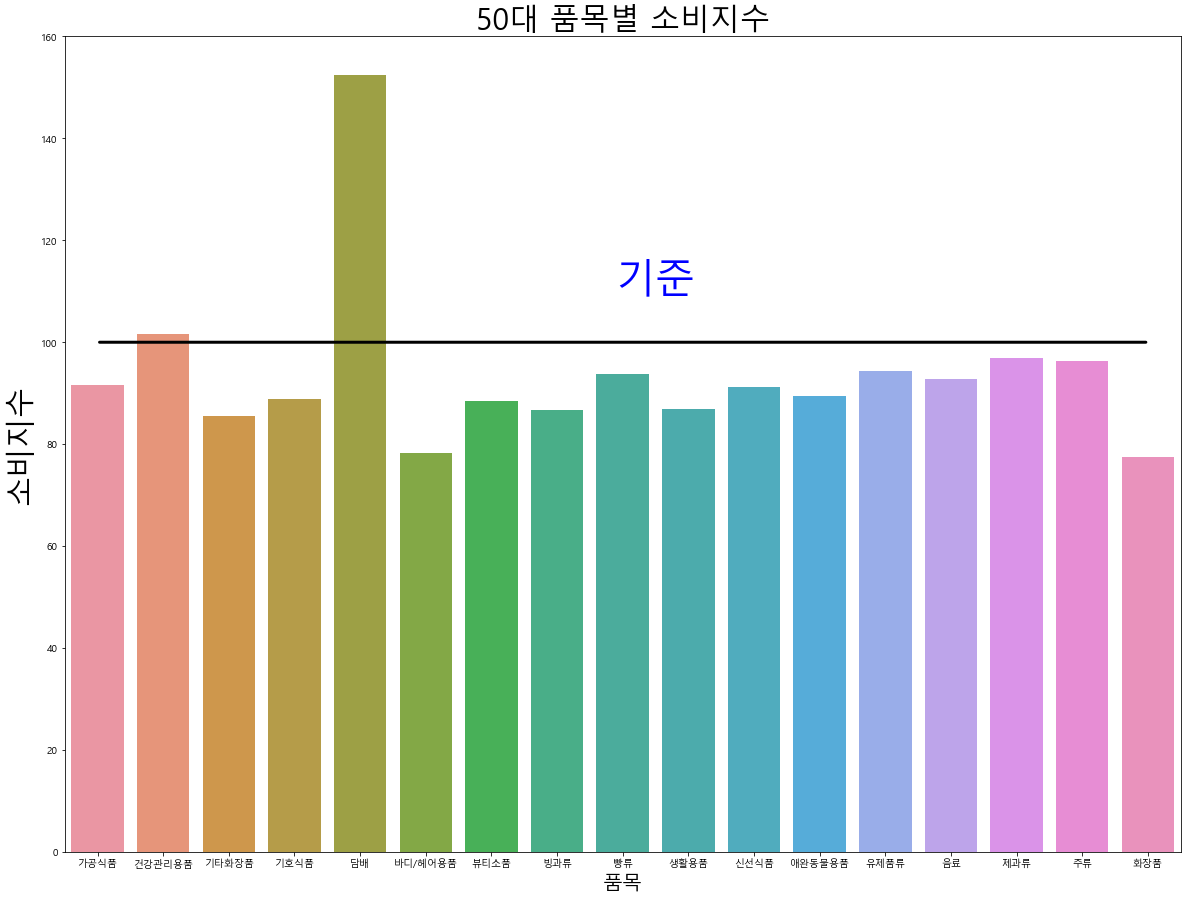

In [178]:
index_50 = index['age'] == '50'
age50 = index[index_50]
age50.drop(['period', 'catl', 'gender', 'sido', 'sigungu'], axis = 1)
catm50 = age50.groupby('catm').mean()
catm50 = catm50.drop('period', axis = 1)
catm50 = catm50.reset_index()
catm50
fig = plt.figure(figsize=(20, 15))
sns.barplot(x="catm", y="cgi", data=catm50 )
plt.title('50대 품목별 소비지수', size = 30)
plt.xlabel( '품목', size = 20 )
plt.ylabel( '소비지수', size = 30 )
plt.annotate( '', xy = ( 0, 100 ), xytext = ( 16, 100 ),  xycoords = 'data',  arrowprops = dict( arrowstyle = '-', color = 'black', lw = 3 ), )
plt.annotate( '기준',  xy = ( 8.5, 110 ), rotation = 0, va = 'baseline', ha = 'center', fontsize = 40, color = 'blue' )

- 40대와 마찬가지로 건강관리용품과 담배를 제외한 모든 품목이 소비지수 100아래에 있어 2개 품목을 제외한 모든 품목의 소비가 하락했음을 확인

### 5) 60대

Text(8.5, 110, '기준')

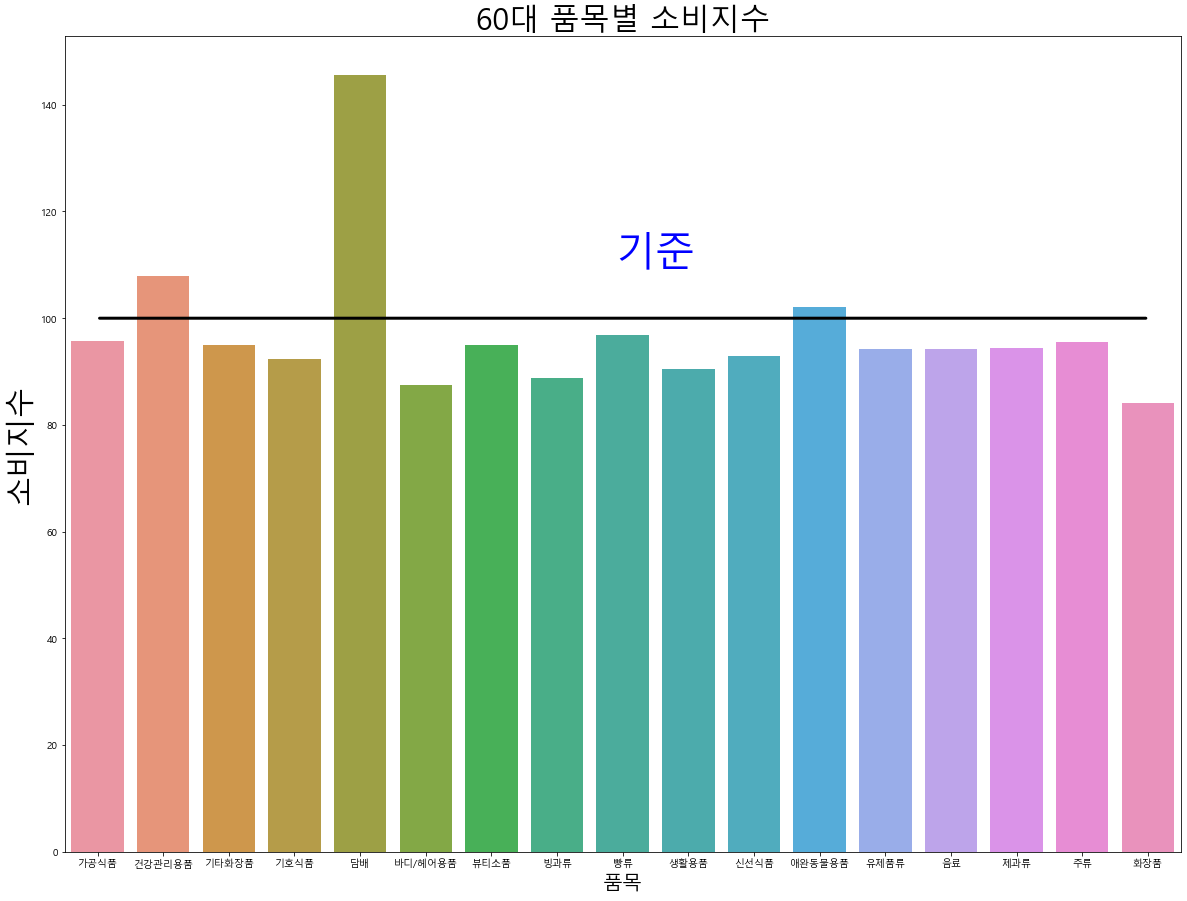

In [179]:
index_60 = index['age'] == '60'
age60 = index[index_60]
age60.drop(['period', 'catl', 'gender', 'sido', 'sigungu'], axis = 1)
catm60 = age60.groupby('catm').mean()
catm60 = catm60.drop('period', axis = 1)
catm60 = catm60.reset_index()
catm60
fig = plt.figure(figsize=(20, 15))
sns.barplot(x="catm", y="cgi", data=catm60 )
plt.title('60대 품목별 소비지수', size = 30)
plt.xlabel( '품목', size = 20 )
plt.ylabel( '소비지수', size = 30 )
plt.annotate( '', xy = ( 0, 100 ), xytext = ( 16, 100 ),  xycoords = 'data',  arrowprops = dict( arrowstyle = '-', color = 'black', lw = 3 ), )
plt.annotate( '기준',  xy = ( 8.5, 110 ), rotation = 0, va = 'baseline', ha = 'center', fontsize = 40, color = 'blue' )

- 건강관리용품, 담배, 애완동물용품을 제외한 모든 품목의 소비지수가 100 아래에 있음 즉, 3개 품목을 제외한 모든 품목의 소비가 하락했음을 확인

### 6) 연령 전체 평균

Text(8.5, 110, '기준')

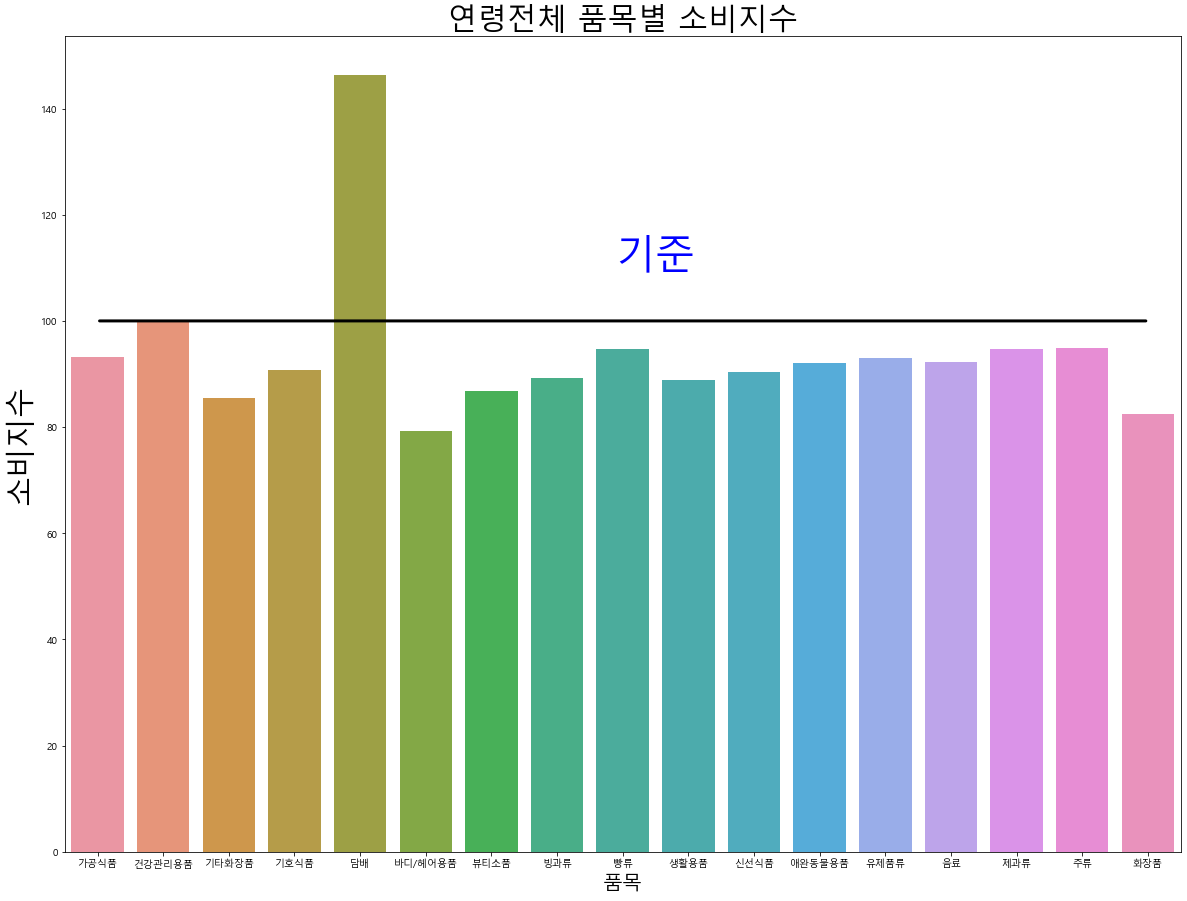

In [180]:
index_all = index['age'] == 'all'
ageall = index[index_all]
ageall.drop(['period', 'catl', 'gender', 'sido', 'sigungu'], axis = 1)
catmall = ageall.groupby('catm').mean()
catmall = catmall.drop('period', axis = 1)
catmall = catmall.reset_index()
catmall
fig = plt.figure(figsize=(20, 15))
sns.barplot(x="catm", y="cgi", data=catmall )
plt.title('연령전체 품목별 소비지수', size = 30)
plt.xlabel( '품목', size = 20 )
plt.ylabel( '소비지수', size = 30 )
plt.annotate( '', xy = ( 0, 100 ), xytext = ( 16, 100 ),  xycoords = 'data',  arrowprops = dict( arrowstyle = '-', color = 'black', lw = 3 ), )
plt.annotate( '기준',  xy = ( 8.5, 110 ), rotation = 0, va = 'baseline', ha = 'center', fontsize = 40, color = 'blue' )

- 전체를 본다면 담배를 제외한 품목들은 모두 소비가 하락했으며 담배만 유일하게 소비지수가 높음

### 한눈에 보기

<img src = "./품목별 연령대 소비지수.jpg" width = "1000">

- 모든 연령대가 담배품목 제외하여 소비지수가 즉, 매출이 줄어들었지만 20대가 소비하는 품목의 소비지수 즉, 매출은 기타화장품을 제외한 모든 품목이 100이상을 기록하여 소비가 꾸준히 이루어짐

## 5. 19년 20년 품목별 소비지수 변화 비교하기

In [656]:
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201901
df201901 = d20[dd20]
df201901 = df201901.groupby('catm').mean()
df201901
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201902
df201902 = d20[dd20]
df201902 = df201902.groupby('catm').mean()
df201902
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201903
df201903 = d20[dd20]
df201903 = df201903.groupby('catm').mean()
df201903
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201904
df201904 = d20[dd20]
df201904 = df201904.groupby('catm').mean()
df201904
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201905
df201905 = d20[dd20]
df201905 = df201905.groupby('catm').mean()
df201905
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201906
df201906 = d20[dd20]
df201906 = df201906.groupby('catm').mean()
df201906
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201907
df201907 = d20[dd20]
df201907 = df201907.groupby('catm').mean()
df201907
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201908
df201908 = d20[dd20]
df201908 = df201908.groupby('catm').mean()
df201908
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201909
df201909 = d20[dd20]
df201909 = df201909.groupby('catm').mean()
df201909
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201910
df201910 = d20[dd20]
df201910 = df201910.groupby('catm').mean()
df201910
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201911
df201911 = d20[dd20]
df201911 = df201911.groupby('catm').mean()
df201911
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 201912
df201912 = d20[dd20]
df201912 = df201912.groupby('catm').mean()
df201912
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 202001
df202001 = d20[dd20]
df202001 = df202001.groupby('catm').mean()
df202001
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 202002
df202002 = d20[dd20]
df202002 = df202002.groupby('catm').mean()
df202002
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 202003
df202003 = d20[dd20]
df202003 = df202003.groupby('catm').mean()
df202003
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 202004
df202004 = d20[dd20]
df202004 = df202004.groupby('catm').mean()
df202004
d_20 = index['age'] == '20'
d20 = index[d_20]
d20 = d20.drop(['catl','age','gender','sido','sigungu'], axis = 1)
dd20 = d20['period'] == 202005
df202005 = d20[dd20]
df202005 = df202005.groupby('catm').mean()
df202005

,period,cgi
catm,,
가공식품,202005,92.771966
건강관리용품,202005,118.238512
기호식품,202005,70.393603
담배,202005,188.647175
바디/헤어용품,202005,72.837890
뷰티소품,202005,81.466648
빙과류,202005,83.481174
빵류,202005,75.155960
생활용품,202005,89.553907


In [657]:
df2020 = pd.concat([df202001,df202002,df202003,df202004,df202005])
df2019 = pd.concat([df201901,df201902,df201903,df201904,df201905,df201906,df201907,df201908,df201909,df201910,df201911,df201912])

In [658]:
df2020['period'] = '2020'
df2019['period'] = '2019'
df2020 = df2020.groupby('catm').mean()
df2019 = df2019.groupby('catm').mean()
df2020 = df2020.reset_index()
df2019 = df2019.reset_index()
df2020.columns = ['catm', 'cgi20']
df2019.columns = ['catm19', 'cgi19']


In [659]:
df20_19 = pd.concat([df2020, df2019], axis = 1)
df20_19 = df20_19.drop('catm19', axis = 1)

In [660]:
df1920 = df20_19.rename(index={0:'가공식품'})
df1920 = df1920.rename(index={1:'건강관리용품'})
df1920 = df1920.rename(index={2:'건강관리용품'})
df1920 = df1920.rename(index={3:'기호식품'})
df1920 = df1920.rename(index={4:'담배'})
df1920 = df1920.rename(index={5:'바디/헤어용품'})
df1920 = df1920.rename(index={6:'뷰티소품'})
df1920 = df1920.rename(index={7:'빙과류'})
df1920 = df1920.rename(index={8:'빵류'})
df1920 = df1920.rename(index={9:'생활용품'})
df1920 = df1920.rename(index={10:'신선식품'})
df1920 = df1920.rename(index={11:'애완동물용품'})
df1920 = df1920.rename(index={12:'유제품류'})
df1920 = df1920.rename(index={13:'음료'})
df1920 = df1920.rename(index={14:'제과류'})
df1920 = df1920.rename(index={15:'주류'})
df1920 = df1920.rename(index={16:'화장품'})
df1920

,catm,cgi20,cgi19
가공식품,가공식품,109.667192,114.051992
건강관리용품,건강관리용품,125.643626,129.839162
건강관리용품,기타화장품,56.180866,102.689625
기호식품,기호식품,94.781344,111.313769
담배,담배,190.650770,178.449331
바디/헤어용품,바디/헤어용품,92.386876,111.932616
뷰티소품,뷰티소품,89.749633,118.771918
빙과류,빙과류,86.721493,109.484410
빵류,빵류,92.522695,113.551507
생활용품,생활용품,94.249990,110.565341


# -----------------------------------------------------------------------------------------------------------

In [397]:
a = df1920[['catm', 'cgi19']]

In [398]:
a

,catm,cgi19
가공식품,가공식품,114.051992
건강관리용품,건강관리용품,129.839162
건강관리용품,기타화장품,102.689625
기호식품,기호식품,111.313769
담배,담배,178.449331
바디/헤어용품,바디/헤어용품,111.932616
뷰티소품,뷰티소품,118.771918
빙과류,빙과류,109.484410
빵류,빵류,113.551507
생활용품,생활용품,110.565341


In [399]:
b = df1920[['catm', 'cgi20']]

In [400]:
b

,catm,cgi20
가공식품,가공식품,109.667192
건강관리용품,건강관리용품,125.643626
건강관리용품,기타화장품,56.180866
기호식품,기호식품,94.781344
담배,담배,190.650770
바디/헤어용품,바디/헤어용품,92.386876
뷰티소품,뷰티소품,89.749633
빙과류,빙과류,86.721493
빵류,빵류,92.522695
생활용품,생활용품,94.249990


In [401]:
a['y'] = 2019

In [405]:
a

,catm,cgi19,y
가공식품,가공식품,114.051992,2019
건강관리용품,건강관리용품,129.839162,2019
건강관리용품,기타화장품,102.689625,2019
기호식품,기호식품,111.313769,2019
담배,담배,178.449331,2019
바디/헤어용품,바디/헤어용품,111.932616,2019
뷰티소품,뷰티소품,118.771918,2019
빙과류,빙과류,109.484410,2019
빵류,빵류,113.551507,2019
생활용품,생활용품,110.565341,2019


In [407]:
b

,catm,cgi20,y
가공식품,가공식품,109.667192,2020
건강관리용품,건강관리용품,125.643626,2020
건강관리용품,기타화장품,56.180866,2020
기호식품,기호식품,94.781344,2020
담배,담배,190.650770,2020
바디/헤어용품,바디/헤어용품,92.386876,2020
뷰티소품,뷰티소품,89.749633,2020
빙과류,빙과류,86.721493,2020
빵류,빵류,92.522695,2020
생활용품,생활용품,94.249990,2020


In [406]:
b['y'] = 2020

In [404]:
pd.concat([a,b])

,catm,cgi19,y,cgi20
가공식품,가공식품,114.051992,2019,NaN
건강관리용품,건강관리용품,129.839162,2019,NaN
건강관리용품,기타화장품,102.689625,2019,NaN
기호식품,기호식품,111.313769,2019,NaN
담배,담배,178.449331,2019,NaN
바디/헤어용품,바디/헤어용품,111.932616,2019,NaN
뷰티소품,뷰티소품,118.771918,2019,NaN
빙과류,빙과류,109.484410,2019,NaN
빵류,빵류,113.551507,2019,NaN
생활용품,생활용품,110.565341,2019,NaN


In [408]:
b = b.rename({'cgi20':'cgi19'}, axis='columns')

In [409]:
b

,catm,cgi19,y
가공식품,가공식품,109.667192,2020
건강관리용품,건강관리용품,125.643626,2020
건강관리용품,기타화장품,56.180866,2020
기호식품,기호식품,94.781344,2020
담배,담배,190.650770,2020
바디/헤어용품,바디/헤어용품,92.386876,2020
뷰티소품,뷰티소품,89.749633,2020
빙과류,빙과류,86.721493,2020
빵류,빵류,92.522695,2020
생활용품,생활용품,94.249990,2020


In [414]:
c = pd.concat([a,b])
c

,catm,cgi19,y
가공식품,가공식품,114.051992,2019
건강관리용품,건강관리용품,129.839162,2019
건강관리용품,기타화장품,102.689625,2019
기호식품,기호식품,111.313769,2019
담배,담배,178.449331,2019
바디/헤어용품,바디/헤어용품,111.932616,2019
뷰티소품,뷰티소품,118.771918,2019
빙과류,빙과류,109.484410,2019
빵류,빵류,113.551507,2019
생활용품,생활용품,110.565341,2019


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text major ticklabel objects>)

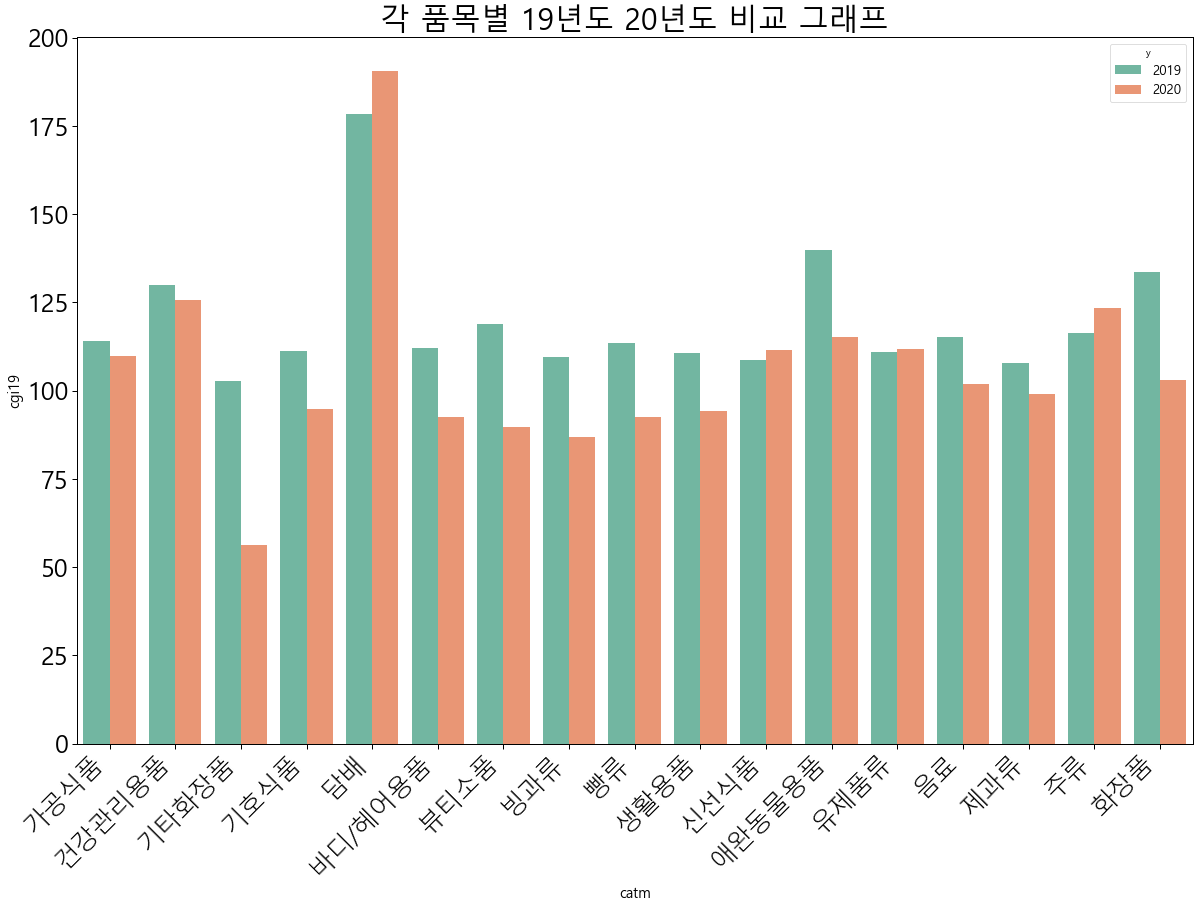

In [421]:
fig = plt.figure(figsize=(20, 13))

sns.set_context("paper", font_scale=1.5)  
fig.patch.set_facecolor('xkcd:white')
plt.title("각 품목별 19년도 20년도 비교 그래프", size = 30)
sns.barplot(data=c,
            x="catm",
            y="cgi19",
            hue="y",
           palette="Set2")

plt.xticks(rotation=45, 
    horizontalalignment='right',
    fontweight='light',
          size = 25)
plt.yticks(size = 25)

-> 담배와 주류를 제외한 모든 품목들이 19년과 비교하여 20년에 들어서는 매출이 하락함 즉, 담배와 주류외에 모든 품목의 시장이 코로나가 발생하고 나서는 전체적으로 각 시장 매출이 줄어듬   
-> 그 중 눈에 띄는 것은 기타화장품, 뷰티소품, 화장품등의 항목이 눈에 띄게 줄어든 것으로 확인됨   
-> 이를 통하여 코로나가 뷰티산업에 끼치는 영향 그리고 코로나 이후 변화된 매출이 이후 뷰티시장을 어떻게 변화시킬지 또 뷰티시장은 어떤 대비를 해야하는지 파악하기로 함 

Text(0.5, 1.0, '19년, 20년 품목별 소비지수 변화 그래프')

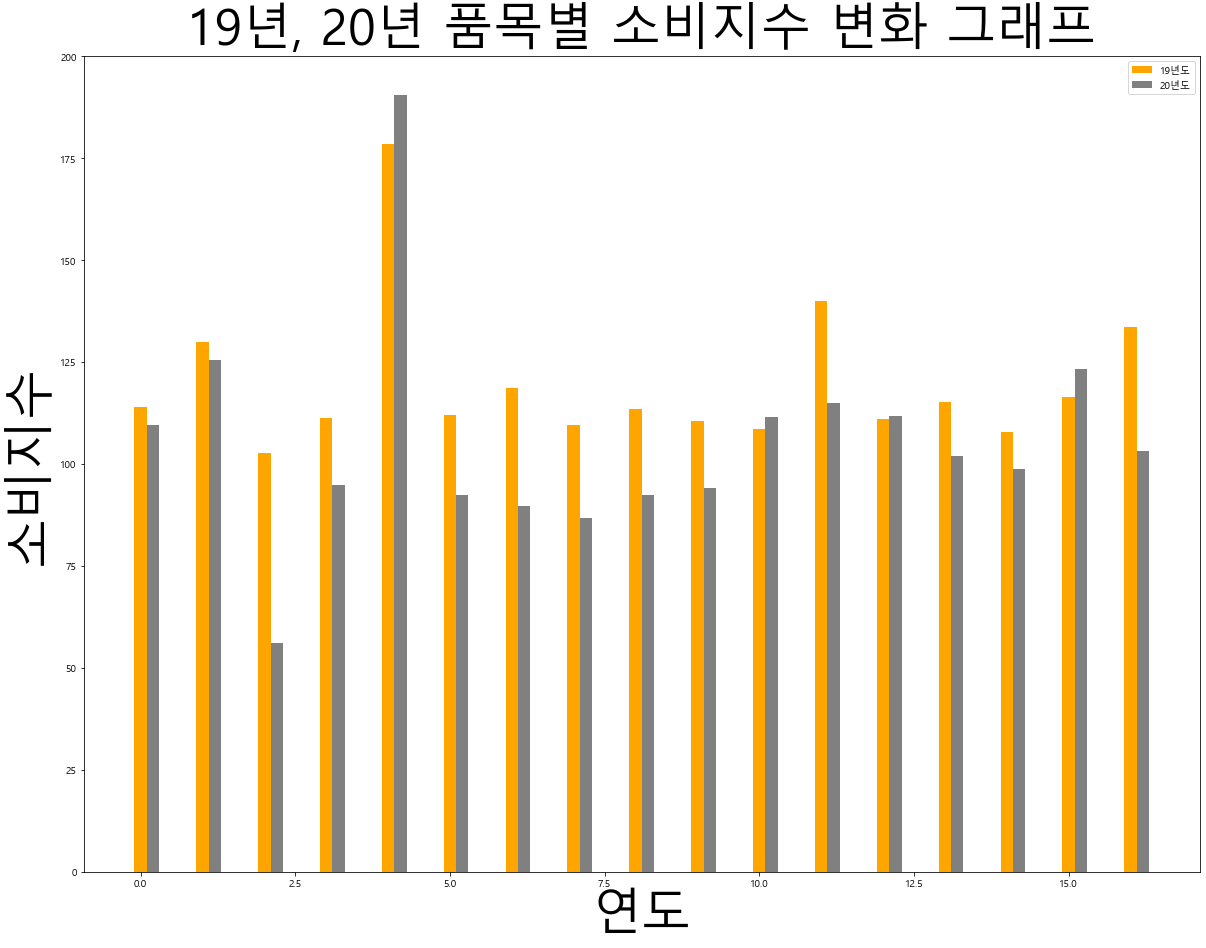

In [385]:
df_20 = np.asarray(df20_19['cgi20'])
df_19 = np.asarray(df20_19['cgi19'])
label = ['가공식품', '건강관리용품', '기타화장품', '기호식품', '담배', '바디/헤어용품', '뷰티소품', '빙과류',
       '빵류', '생활용품', '신선식품', '애완동물용품', '유제품류', '음료', '제과류', '주류', '화장품']

plt.figure(figsize=(20, 15))

x = np.arange(len(label))

plt.bar(x-0.0, df_19, label = '19년도', width = 0.2, color = 'orange')
plt.bar(x+0.2, df_20, label = '20년도', width = 0.2, color = 'gray')

plt.legend()
plt.xlabel('연도', size = 50)
plt.ylabel('소비지수', size = 50)
plt.ylim(0, 200)
plt.title('19년, 20년 품목별 소비지수 변화 그래프', size = 50)


### 6. 화장품 산업 EDA

In [550]:
cos1 = pd.read_csv('소매업태별_판매액지수_2015100.0__20200730105717.csv', encoding = 'utf-8')
cos1

,업태별,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04 p),2020. 05 p)
0,업태별,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수,경상지수
1,가전·컴퓨터·통신기기 소매점,88.4,80.4,103.9,94.4,101.0,95.9,94.3,103.8,83.9,91.5,94.7,87.3,83.8,83.9,84.4,85.2,95.6
2,의복·신발·가방 소매점,97.7,91.8,111.4,103.5,114.0,98.1,85.1,78.8,94.0,108.5,118.7,107.6,87.6,62.8,59.3,75.7,102.0
3,음식·가정· 문화상품 소매점,92.0,85.3,91.8,92.8,88.4,86.3,85.7,83.2,94.7,89.5,85.7,94.5,98.9,85.7,79.3,84.2,94.4
4,의약품·화장품·기타상품 소매점,102.8,95.6,106.6,106.0,110.3,103.6,102.6,102.9,103.3,106.3,107.3,110.8,106.9,94.8,90.2,94.3,100.5
5,인터넷 쇼핑,206.5,180.5,215.6,206.1,219.2,199.8,209.1,204.9,208.7,221.3,246.3,236.8,223.5,244.7,277.0,260.9,277.1
6,홈쇼핑,142.2,116.1,137.0,133.5,137.1,125.8,127.2,123.1,127.6,143.0,142.0,141.8,136.2,134.4,151.2,137.8,144.7
7,방문 및 배달 소매점,92.7,74.9,85.3,90.3,91.4,81.8,85.7,82.7,83.3,85.0,79.3,80.8,87.2,74.2,78.6,80.1,79.2


In [554]:
cos2 = cos1.drop(0)
cos3 = cos2.reset_index()
cos4 = cos3.drop('index', axis = 1)
cos4.columns = ['year','2019. 01','2019. 02','2019. 03','2019. 04','2019. 05','2019. 06','2019. 07','2019. 08','2019. 09','2019. 10','2019. 11','2019. 12','2020. 01','2020. 02','2020. 03','2020. 04','2020. 05']
cos5 = cos4.T
cos6 = cos5.reset_index()
cos7 = cos6.drop(0)
cos7
cos7.columns = ['year','HA','outfit','FC','MC','IS','HS','DEL']
cos7
# HA = 가전, 컴퓨터, 통신기기
# outfit = 의복, 신발, 가방 등 
# FC = 음식, 가정, 문화상품
# MC = 의약품, 화장품, 기타상품
# IS = 인터넷 쇼핑
# HS = 홈쇼핑
# DEL = 방문 및 배달

,year,HA,outfit,FC,MC,IS,HS,DEL
1,2019. 01,88.4,97.7,92.0,102.8,206.5,142.2,92.7
2,2019. 02,80.4,91.8,85.3,95.6,180.5,116.1,74.9
3,2019. 03,103.9,111.4,91.8,106.6,215.6,137.0,85.3
4,2019. 04,94.4,103.5,92.8,106.0,206.1,133.5,90.3
5,2019. 05,101.0,114.0,88.4,110.3,219.2,137.1,91.4
6,2019. 06,95.9,98.1,86.3,103.6,199.8,125.8,81.8
7,2019. 07,94.3,85.1,85.7,102.6,209.1,127.2,85.7
8,2019. 08,103.8,78.8,83.2,102.9,204.9,123.1,82.7
9,2019. 09,83.9,94.0,94.7,103.3,208.7,127.6,83.3
10,2019. 10,91.5,108.5,89.5,106.3,221.3,143.0,85.0


In [555]:
cos7['HA'] = cos7['HA'].astype(float)
cos7['outfit'] = cos7['outfit'].astype(float)
cos7['FC'] = cos7['FC'].astype(float)
cos7['MC'] = cos7['MC'].astype(float)
cos7['IS'] = cos7['IS'].astype(float)
cos7['HS'] = cos7['HS'].astype(float)
cos7['DEL'] = cos7['DEL'].astype(float)
cos7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 17
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    17 non-null     object 
 1   HA      17 non-null     float64
 2   outfit  17 non-null     float64
 3   FC      17 non-null     float64
 4   MC      17 non-null     float64
 5   IS      17 non-null     float64
 6   HS      17 non-null     float64
 7   DEL     17 non-null     float64
dtypes: float64(7), object(1)
memory usage: 1.2+ KB


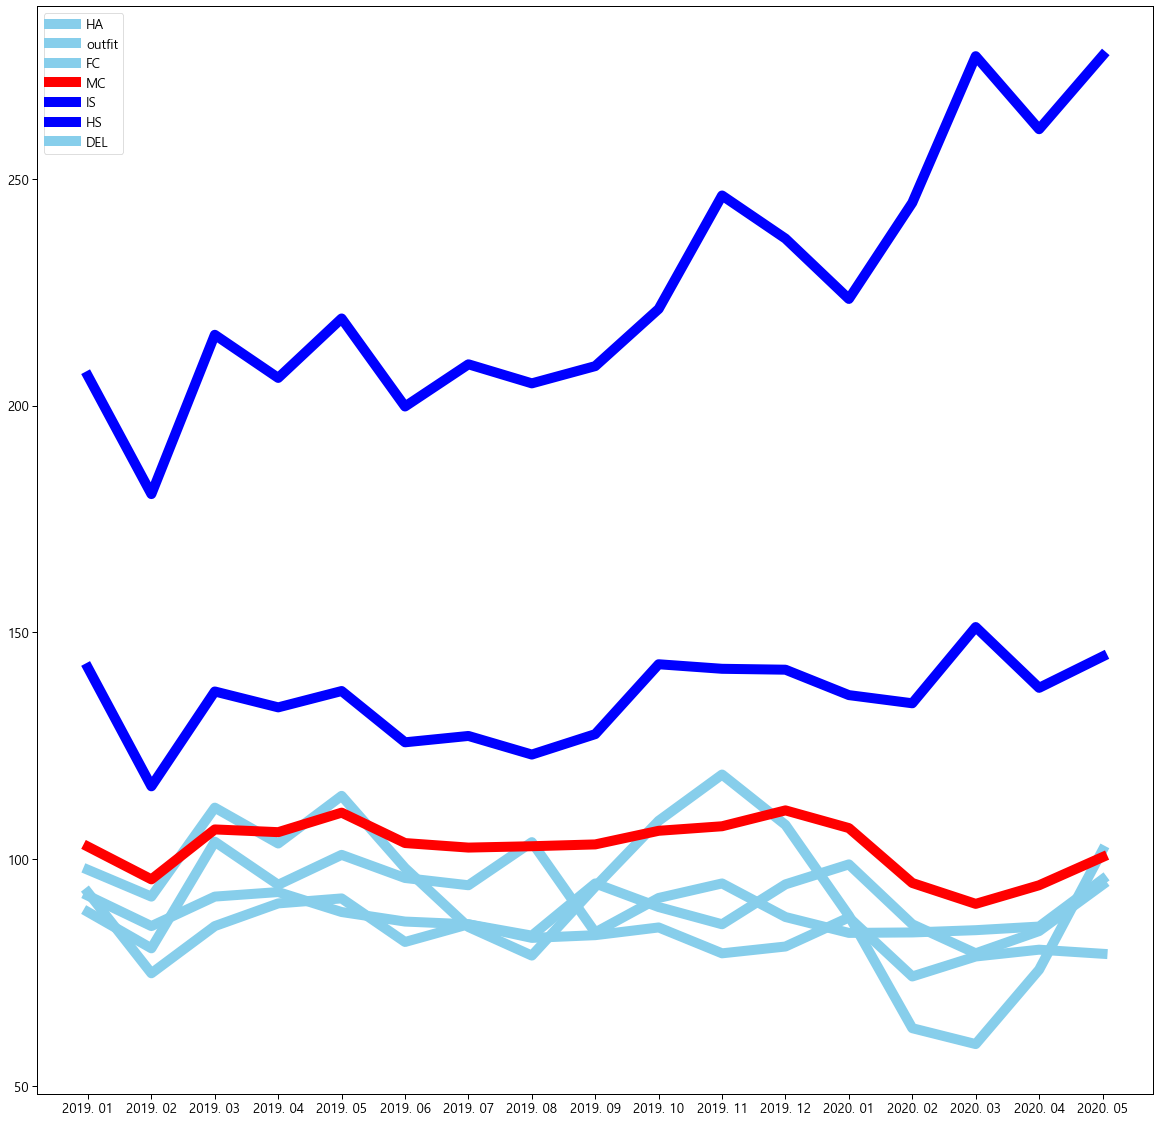

In [557]:
plt.figure(figsize=(20, 20))
plt.plot(cos7.year, cos7.HA, linewidth=10, color = 'skyblue')
plt.plot(cos7.year, cos7.outfit, linewidth=10, color = 'skyblue')
plt.plot(cos7.year, cos7.FC, linewidth=10, color = 'skyblue')
plt.plot(cos7.year, cos7.MC, linewidth=10, color = 'red')
plt.plot(cos7.year, cos7.IS, linewidth=10, color = 'blue')
plt.plot(cos7.year, cos7.HS, linewidth=10, color = 'blue')
plt.plot(cos7.year, cos7.DEL, linewidth=10, color = 'skyblue')
plt.legend(['HA','outfit','FC','MC','IS','HS','DEL'])

-> 화장품시장은 코로나 이후 다른 품목 시장들과 같이 하락한 것을 확인 할 수 있고 다른 시장들에 비해 홈쇼핑과 인터넷 쇼핑은 코로나 이후에도 성장한 것을 확인   
- 첫번째 파란색 : 온라인쇼핑   
- 두번째 파란색 : 홈쇼핑   
- 빨간색 : 화장퓸 시장

### 7. 온라인쇼핑 거래액 EDA

In [559]:
os = pd.read_csv('온라인쇼핑몰_판매매체별_상품군별거래액_20200730135807.csv', encoding = 'utf-8')
os

,상품군별,판매매체별,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04 p),2020. 05 p)
0,합계,계,10722987,9607307,11259178,10671636,11253413,10604209,11197264,11278634,11261479,11871192,12852096,12684652,12304762,11963252,12624728,12055233,12722071
1,합계,인터넷쇼핑,3910043,3397801,4154481,3945263,4067849,3709250,3951331,3983518,3977628,4109426,4434397,4349481,4081181,3850850,4138678,4024042,4027710
2,합계,모바일쇼핑,6812944,6209506,7104697,6726373,7185564,6894959,7245933,7295116,7283852,7761766,8417698,8335170,8223581,8112402,8486051,8031191,8694362
3,화장품,계,898316,861069,1023636,961714,989219,943868,984890,1037824,1101042,1155470,1234621,1190553,1127048,1049681,981864,960851,935992
4,화장품,인터넷쇼핑,326699,300156,414794,382837,396137,374640,396202,432088,482897,501064,556145,491525,473776,429543,532733,594911,525803
5,화장품,모바일쇼핑,571617,560913,608843,578876,593083,569228,588687,605736,618145,654405,678476,699028,653273,620138,449132,365941,410190


In [587]:
os1 = os.drop([1,2,4,5])
os2 = os1.reset_index()
os3 = os2.drop(['index','판매매체별'], axis = 1)
os3.rename(columns = {'2020. 04 p)':'2020. 04','2020. 05 p)':'2020. 05'}, inplace = True)
os4 = os3.T
os5 = os4.reset_index()
os5.columns = ['year','total','cosmetic']
os6 = os5.drop(0)
os7 = os6.reset_index()
os8 = os7.drop('index', axis = 1)
os8

,year,total,cosmetic
0,2019. 01,10722987,898316
1,2019. 02,9607307,861069
2,2019. 03,11259178,1023636
3,2019. 04,10671636,961714
4,2019. 05,11253413,989219
5,2019. 06,10604209,943868
6,2019. 07,11197264,984890
7,2019. 08,11278634,1037824
8,2019. 09,11261479,1101042
9,2019. 10,11871192,1155470


In [648]:
os8['year'] = 1
os9 = os8.astype(int)
os10 = os9.groupby('year').mean()
os10

,total,cosmetic
year,,
1,1.158436e+07,1.025745e+06


Text(0.5, 1.0, '인터넷쇼핑 부문 화장품 시장 비율(%)')

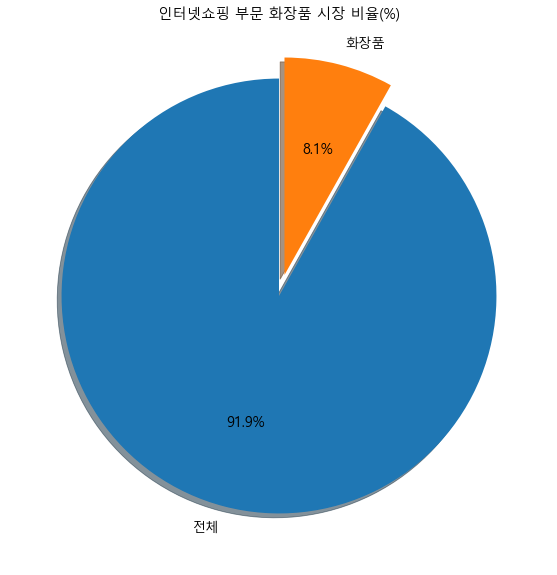

In [655]:
labels = '전체', '화장품'
sizes = np.asarray([os10['total'][1],os10['cosmetic'][1]])
explode = (0, 0.1) 
plt.figure( figsize = ( 10, 10 ))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('인터넷쇼핑 부문 화장품 시장 비율(%)')

-> 인터넷쇼핑 부문 화장품 시장

Text(11, 1240000, '')

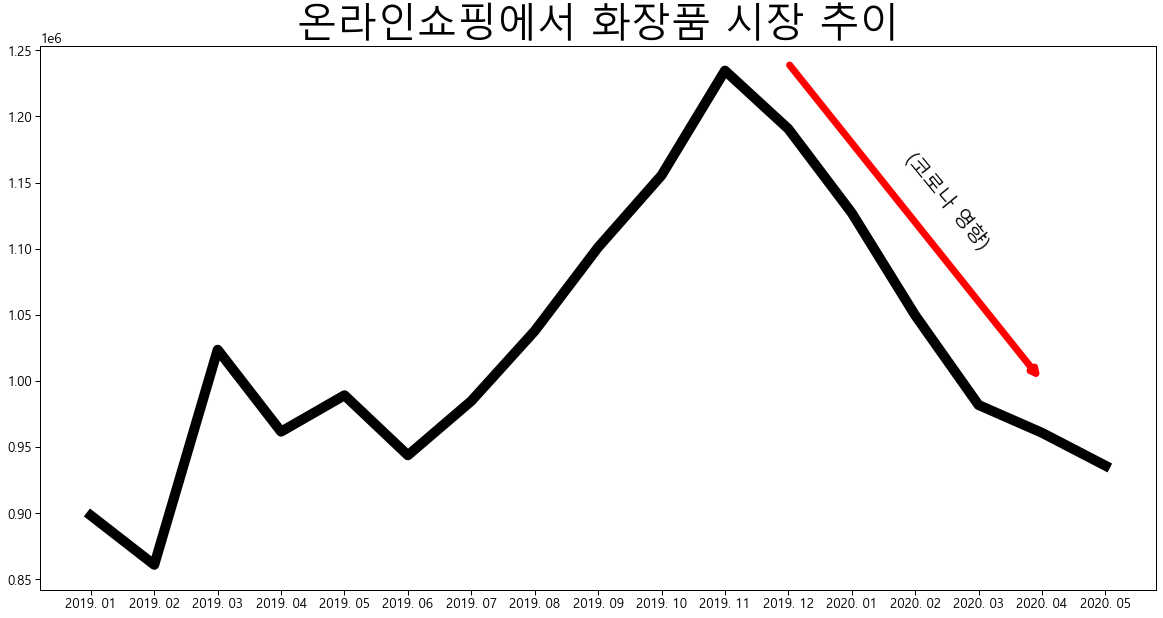

In [628]:
plt.figure(figsize=(20, 10))
plt.plot(os8.year, os8.cosmetic, linewidth=10, color = 'black')
plt.title('온라인쇼핑에서 화장품 시장 추이', size = 40)
plt.annotate( '(코로나 영향)',   
               xy = ( 13.5, 1100000 ),           
              rotation = -50.5,               
              va = 'baseline',                 
              ha = 'center',                   
              fontsize = 20,                   
             )

plt.annotate( '',
              xy = ( 15, 1000000 ),      
              xytext = ( 11, 1240000 ),    
              xycoords = 'data',        
              arrowprops = dict( arrowstyle = '->', color = 'red', lw = 7 ), 
             )

-> 화장품 시장 자체가 코로나 이후 저성장 즉, 매출이 감소하는 추세 

## 7. EDA 결과

- 코로나 이후 전체적인 소비지수가 하락한 것을 파악하고 각 연령별 세부적인 EDA를 하면서 20대들이 다른 연령대와 다르게 코로나에 영향을 받지 않고 꾸준히 소비하는 것을 확인하였다.   
- 그래서 20대들의 소비 특징을 확인하려 20대가 소비하는 각 품목의 매출을 확인하였더니 뷰티산업쪽의 매출이 코로나 이후 현저히 하락한 것을 확인 함   
- 코로나 이후에도 꾸준한 소비를 하는 20대를 바탕으로 꾸준히 소비하는 그들에게도 나타나는 뷰티산업의 하락을 도출하였고 코로나 이후에는 뷰티시장의 성장이 지속적으로 하락할 것으로 예상한다.

* 코로나로 인해 하락하는 이유 : 코로나 발생으로 시민들의 거리두기 및 마스크 착용은 필수가 되었다 또한 여행 및 모임자제로 인해 사람들은 밖으로 나갈 일이 줄어들게 되는데 이로인해 뷰티산업 즉, 외출을 위해 꾸미고 정돈하는 기능의 화장품 시장이 몰락하기 시작했다. 따라서 마스크로 인해 뷰티시장의 매출이 하락한 것으로 파악하고 코로나가 장기적으로 이어지고 마스크를 쓰는 문화가 자연스럽게 자리잡을 것으로 예상해 마스크로 인해 생기는 문제점(특히 피부트러블)을 파악하고 실제로 이러한 문제들이 나타나고 있기 때문에 화장품 회사들은 꾸미는 색조화장의 투자를 줄이고 피부 트러블을 치료하는 기능성 화장품 산업에 투자하여 코로나로 인한 산업의 변화를 극복해나가는 것이 우리가 도출해낸 결론이다.

# 8. 결론

1) 기사인용 No.1

<img src = "./포스트 코로나 결론.png" width = "1000">

2) 기사인용 No.2

<img src = "./포스트 코로나 결론2.png" width = "1000">

3) 기사인용 No.3

<img src = "./포스트 코로나 결론3.png" width = "1000">

4) 기사인용 No.4

<img src = "./포스트 코로나 결론4.png" width = "1000">

-> 마스크로 인해 생긴 트러블을 화장품 회사의 미래 먹거리로 정하고 해당 사업을 집중적으로 키우는 것이 포스트 코로나에 대처하는 화장품회사의 전략으로 본다.